# Homework5: Normalizing flows

## Task 1: Theory (5pt)

### Problem 1: Sylvester flow (2.5pt)

At the Seminar 6, we have studied planar flows of the form:
$$
    \mathbf{x} = g(\mathbf{z}, \boldsymbol{\theta}) = \mathbf{z} + \mathbf{u} h(\mathbf{w}^T\mathbf{z} + b),
$$
where $\mathbf{u} \in \mathbb{R}^m$,  $\mathbf{w} \in \mathbb{R}^m$, $b \in \mathbb{R}$.

There is a natural generalization of planar flows of the form:
$$
   \mathbf{x} = g(\mathbf{z}, \boldsymbol{\theta}) = \mathbf{z} + \mathbf{V} h(\mathbf{W}^T\mathbf{z} + \mathbf{b}),
$$
where $\boldsymbol{\theta} = \{\mathbf{V}, \mathbf{W}, \mathbf{b}\}$, $\mathbf{V} \in \mathbb{R}^{m \times k}$,  $\mathbf{W} \in \mathbb{R}^{m \times k}$, $\mathbf{b} \in \mathbb{R}^k$, $h : \mathbb{R}^k \rightarrow \mathbb{R}$ is nonlinear function, which applied pointwise to the elements of the vector $\mathbf{W}^T\mathbf{z} + \mathbf{b}$. This flow is called [Sylvester flow](https://arxiv.org/abs/1803.05649).
1) Prove a simplified version of the matrix-determinant lemma:
$$
    \det (\mathbf{I}_m + \mathbf{V} \mathbf{W}^T) = \det (\mathbf{I}_k + \mathbf{W}^T \mathbf{V}).
$$
2) Calculate the determinant of the Jacobi matrix for the Sylvester flow  and apply the lemma proved in the previous paragraph to it.
3) In order to reduce the complexity for the determinant calculation (and ensure the invertibility of the transform $g(\mathbf{z}, \boldsymbol{\theta})$), the authors proposed to parametrize the matrices $\mathbf{V}$ and $\mathbf{W}$ as follows:
$$
    \mathbf{V} = \mathbf{Q} \mathbf{U}; \quad \mathbf{W} = \mathbf{Q} \mathbf{L},
$$
where $\mathbf{Q} \in \mathbb{R}^{m \times k}$ — orthogonal matrix ($\mathbf{Q}^T \mathbf{Q} = \mathbf{I}$), $\mathbf{U} \in \mathbb{R}^{k \times k}$ — upper triangular matrix, $\mathbf{L} \in \mathbb{R}^{k \times k}$ — lower triangular matrix ([wiki](https://en.wikipedia.org/wiki/Triangular_matrix)). Write out an expression for the Jacobian determinant using this parametrization.
4) Calculate and compare the complexity for calculating the determinant of the Jacobi matrix 
   * before applying the lemma; 
   * after applying the lemma;
   * after applying the $\mathbf{Q} \mathbf{U}$, $\mathbf{Q} \mathbf{L}$ parametrization.

5) Which conditions should be imposed on the matrices $\mathbf{U}$ , $\mathbf{L}$ and nonlinearity $h$ in order to guarantee the invertibility of the transform $g$. 

   **Hint**: What conditions guarantee non-degeneracy of the determinant of the jacobian $\det \mathbf{J}_g$? Recall the planar flows case ($k = 1$) that was considered at Seminar 6.

```your solution```

### Problem 2: Expressivity of normalizing flows (2.5pt)

Let $\pi(\mathbf{x})$ is an absolutely continuous probability distribution supported everywhere on $\mathbb{R}^m$ (i.e. $\pi(\mathbf{x}) > 0$ for all $\mathbf{x} \in \mathbb{R}^m$). Additionally we suppose, that the pdf $\pi(\mathbf{x})$ is continuously differentiable on  $\mathbb{R}^m$.  Our ultimate goal is to show, that there exists diffeomorphism (invertible continuously differentiable map): 
$$ 
    \mathbf{u} = F(\mathbf{x}) \quad F : \mathbb{R}^m \rightarrow \mathbb{U}.
$$
Here $\mathbb{U} = [0, 1]^m$ is a hypercube, which turns $\pi(\mathbf{x})$ into uniform distribution $p(\mathbf{u}) = U[0, 1]^m$ on the hypercube $\mathbb{U}$ ($p(\mathbf{u}) = 1 \,,\, \mathbf{u} \in \mathbb{U}$). Here we have to think about openness and closeness of $\mathbb{U}$ for formal math correctness, but we omit it in this task. <sub><sup><i>Math correctness comment</i>: Strictly speaking, the diffeomorphism $F$ maps $\mathbb{R}^m$ to the open cube $\text{int}\left(\mathbb{U}\right) = (0, 1)^m$, sinse the reverse mapping $F^{-1} : \text{int}\left(\mathbb{U}\right) \rightarrow \mathbb{R}^m$ is continuous $\Rightarrow$ the preimage of the open set $\mathbb{R}^m$ with respect to $F^{-1}$ should be <b>open</b>: $(F^{-1})^{-1}(\mathbb{R}^m) = F(\mathbb{R}^m) = \text{an open set}$</sup></sub>

If such function exists, it means that **there exists normalizing flow model from base uniform distribution to any(!) target distribution.**

---------

1. Consider the autoregressive decomposition of $\pi(\mathbf{x})$:

    $$\pi(\mathbf{x}) = \prod\limits_{j = 1}^{m} \pi(x_j|\mathbf{x}_{1:j - 1}).$$

2. Treat each component $\pi(x_j|\mathbf{x}_{1:j - 1})$ in the decomposition above separately. Consider the transformations:

    $$\mathbf{x} \rightarrow u_j = F_j(x_j, \mathbf{x}_{1:j - 1}) = \int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j'.$$

   Here $F_j(x_j, \mathbf{x}_{1:j - 1})$ is the cumulative distribution function of $j$-th conditional $x_j$ (given $\mathbf{x}_{1:j - 1}$) Note, that $u_j \in [0, 1]$.

3. Define the transform $F : \mathbb{R}^m \rightarrow \mathbb{U}$ as follows:

    $$\mathbf{x} \rightarrow \mathbf{u} = \begin{bmatrix} F_1(x_1) \\ F_2(x_2,x_1) \\ \dots \\ F_m(x_m, \mathbf{x}_{1:m-1})\end{bmatrix}.$$
    
    Given the properties of $\pi$ ($\pi(\mathbf{x}) > 0$ and continuously differentiable) it is easy to show, that $F$ is continuously differentiable. We omit the details since they are just boring mathematical calculations.

    **Subproblem 2.1 (0.5pt):** Prove, that the function $F : \mathbb{R}^m \rightarrow \mathbb{U}$ is invertible. <sub><sup><i>Math correctness comment</i>: Strictly speaking, $F : \mathbb{R}^m \rightarrow \text{int}\left(\mathbb{U}\right)$ is invertible</sup></sub>

    **Subproblem 2.2 (1pt):** Prove, that $\det \mathbf{J}_F (\mathbf{x}) = \pi(x)$.

    **Subproblem 2.3 (1pt):** Prove, that $\mathbf{u}$ is a uniformly distributed ($p(\mathbf{u}) = U[0,1]^m)$.
    
    **Subproblem 2.4\* (extra 1pt):** Let $\pi(\mathbf{x})$ and $\mu(\mathbf{y})$ are absolutely continuous probability distributions supported everywhere on $\mathbb{R}^m$, whose pdfs are continuously differentiable. Prove that there exists a diffeomorphism $G : \mathbb{R}^m \rightarrow \mathbb{R}^m$ which turns $\pi$ into $\mu$, i.e.:

    $$\mathbf{y} = G(\mathbf{x}), \quad \text{where } \mathbf{x} \sim \pi(\mathbf{x}), \, \mathbf{y} \sim \mu(\mathbf{y}).$$

```your solution```

In [ ]:
REPO_NAME = "2022-2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()


import sys
import platform
has_gpu = torch.cuda.is_available()
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-13.4.1-arm64-arm-64bit
PyTorch Version: 1.13.0

Python 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:38:29) [Clang 13.0.1 ]
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

import seaborn as sns
sns.set_theme("paper")

device = torch.device("mps")

import sys
sys.path.append('../../homeworks')

from dgm_utils import train_model, plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples, visualize_2d_densities
from dgm_utils import show_samples, visualize_images, load_dataset

/Users/andreichekunov/miniforge3/envs/hard_ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/andreichekunov/miniforge3/envs/hard_ml/lib/python3.10/site-packages/torchvision/image.so, 0x0006): symbol not found in flat namespace '__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE'
  warn(f"Failed to load image Python extension: {e}")


## Task 2: RealNVP on 2d data (3pt)

In this task you will implement [RealNVP](https://arxiv.org/abs/1605.08803) model on 2d moons dataset.


The following function generates the data (do not change it).

In [3]:
def generate_moons_data(count):
    data, labels = make_moons(n_samples=count, noise=0.1)
    data = data.astype('float32')
    split = int(0.8 * count)
    train_data, test_data = data[:split], data[split:]
    train_labels, test_labels = labels[:split], labels[split:]
    return train_data, train_labels, test_data, test_labels

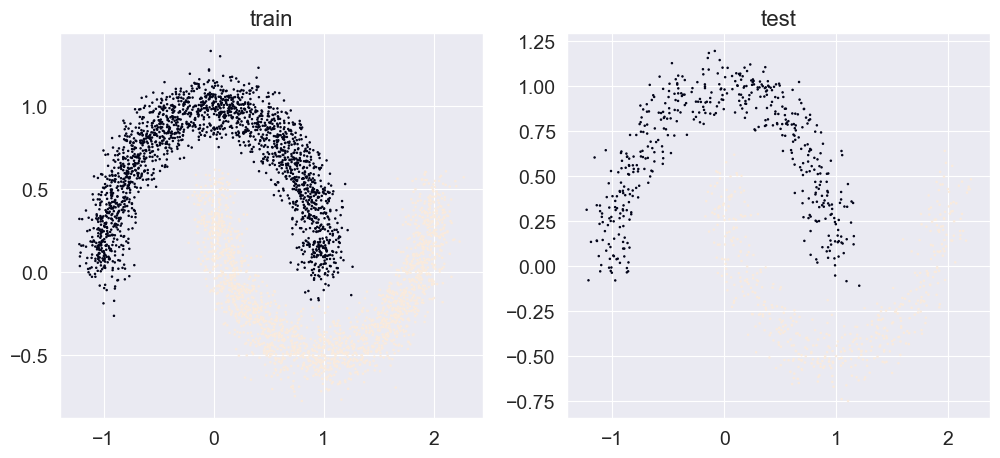

In [5]:
COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)
visualize_2d_data(train_data, test_data, train_labels, test_labels)

Our model will be a sequence of the affine coupling layers. Note that you have to permute the features that left unchanged between different layers (change order of $\mathbf{x}_1$ and $\mathbf{x}_2$ in the formulas below).

Forward transform:
$$
    \begin{cases}
        \mathbf{y}_1 &= \mathbf{x}_1; \\
        \mathbf{y}_2 &= \mathbf{x}_2 \odot \exp (s(\mathbf{x}_1)) + t(\mathbf{x}_1).
    \end{cases} 
$$

Inverse transform:
$$
    \begin{cases}
        \mathbf{x}_1 &= \mathbf{y}_1; \\
        \mathbf{x}_2 &= (\mathbf{y}_2 - t(\mathbf{y}_1)) \odot \exp ( - s(\mathbf{y}_1)).
    \end{cases} 
$$

Here $s(\cdot)$ and $t(\cdot)$ are outputs of neural network. In this task our networks will be fully connected MLP.

In [4]:
class FullyConnectedMLP(nn.Module):
    def __init__(self, input_shape, hiddens, output_shape):
        assert isinstance(hiddens, list)
        super().__init__()
        self.input_shape = (input_shape,)
        self.output_shape = (output_shape,)
        self.hiddens = hiddens

        model = []

        # ====
        # your code 
        # Stack Dense layers with ReLU activation.
        # Note that you do not have to add relu after the last dense layer
        h0 = input_shape
        for i, h in enumerate(hiddens): 
            if i < len(hiddens) - 1:
                model.append(nn.Linear(h0, h))
                model.append(torch.nn.ReLU())
                h0 = h
            else:
                model.append(nn.Linear(h0, output_shape))
        # ====
        self.net = nn.Sequential(*model)

    def forward(self, x):
        # ====
        # your code
        # apply network that was defined in __init__ and return the output
        return self.net(x)

In [5]:
mlp = FullyConnectedMLP(input_shape=2, hiddens=[4, 4, 4], output_shape=2)
print(mlp)

FullyConnectedMLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=2, bias=True)
  )
)


Let define the affine coupling layer.

In [6]:
class AffineCouplingLayer(nn.Module):
    def __init__(self, parity_type, n_hiddens, device=device):
        assert isinstance(parity_type, bool)
        assert isinstance(n_hiddens, list)
        super().__init__()
        self.mask = self.build_mask(parity_type=parity_type).to(device)
        self.mlp = FullyConnectedMLP(input_shape=2, hiddens=n_hiddens, output_shape=2)

    def build_mask(self, parity_type):
        # ====
        # your code
        # the mask is extremely simple
        # it is a float tensor of two scalars (1.0 and 0.0)
        # the partition_type defines the order of these two scalars
        return torch.tensor((1. * parity_type, 1. - parity_type))
        # ====

    def forward(self, x, invert=False):
        # ====
        # your code
        # 1) mask our input x, using self.mask
        # 2) apply mlp to masked input to get s and t 
        
        x_masked = x*self.mask
        s, t = self.mlp(x_masked).chunk(2, dim=1)

        # ====

        # we invert mask here
        t = t * (1.0 - self.mask)
        s = s * (1.0 - self.mask)

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform (invert=False)
        if not invert:
            # forward: z = f(x)
            x = t + x*torch.exp(s)
        else:
            # invert: x = g(z)
            x = (x - t) * torch.exp(-s)
        # ====
       
        # the output is transformed input 
        # and logarithm of jacobian (which equals to s)
        return x, s
        

def test_affine_coupling_layer():
    x = torch.zeros((4, 2), dtype=torch.float32).to(device)

    layer = AffineCouplingLayer(parity_type=True, n_hiddens=[4, 4]).to(device)
    mask = np.array([1, 0], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (4, 2)
    assert tuple(out2.size()) == (4, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((2, 2)))

    layer = AffineCouplingLayer(parity_type=False, n_hiddens=[4, 4]).to(device)
    mask = np.array([[0, 1]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (4, 2)
    assert tuple(out2.size()) == (4, 2)

    assert np.allclose(out1.cpu().detach().numpy() * mask, np.zeros((4, 2)))

test_affine_coupling_layer()

We are ready to define RealNVP model. The model objective is the negative value of log-likelihood. Log-likelihood is given by the change of variables (CoV) theorem:
$$
	\log p(\mathbf{x}| \boldsymbol{\theta}) = \log p(\mathbf{z}) + \log \left|\det \left(  \frac{\partial \mathbf{z}}{\partial \mathbf{x}} \right) \right| = \log p(f(\mathbf{x}, \boldsymbol{\theta})) + \log \left|\det \left( \frac{\partial f(\mathbf{x}, \boldsymbol{\theta})}{\partial \mathbf{x}} \right) \right|.
$$

In [7]:
print(AffineCouplingLayer(parity_type=True, 
                          n_hiddens=[128, 128]))

AffineCouplingLayer(
  (mlp): FullyConnectedMLP(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=2, bias=True)
    )
  )
)


In [8]:
class RealNVP(nn.Module):
    def __init__(self, device=device):
        super().__init__()
        # base distribution p(z) is normal
        self.prior = torch.distributions.Normal(torch.tensor(0.), torch.tensor(1.))
        # ====
        # your code
        # apply sequence of AffineCouplingLayer with alternating parity_type
        # 6 layers is sufficient (with 2 hidden layers in each affine layer)
        self.device=device
        coupling_layers = []
        for i in range(6):
            parity_type = (1 == i % 2)
            coupling_layers.append(AffineCouplingLayer(parity_type=parity_type, 
                                                       n_hiddens=[128, 128]))
        #self.net = nn.Sequential(*coupling_layers)
        self.net = nn.ModuleList(coupling_layers)
        # ====
        
    def forward(self, x, invert=False):
        z = x
        log_det = 0.0

        # ====
        # your code
        # apply sequence of transforms and sum all of log_dets
        # if invert == True, 
        # you have to apply transforms in reversed order (from last to first!) with invert=True flag
        
        if invert:
            layesr = self.net
        else:
            layesr = self.net[::-1]
            
        for l in layesr:
            z, log_det_current = l(z, invert=invert)
            log_det += log_det_current.mean()
              
        # ====
        return z, log_det

    def log_prob(self, x):
        # ====
        # your code
        # 1) make forward pass with right inverse flag
        # 2) sum log_det with log of base distribution (log p(z)) - see the formula above
        # 3) we will get tensor of shape [batch_size, 2] - sum it over the the last dimension
        z, log_det = self.forward(x, invert=False)
        return (self.prior.log_prob(z) + log_det).sum(dim=-1) 
        # ====

    def loss(self, x):
        log_prob = self.log_prob(x)
        # log_prob should be a vector of batch_size
        assert len(log_prob.shape) == 1
        print(- log_prob.mean())
        return {'nll_loss': - log_prob.mean()}

    def sample(self, n):
        # ====
        # your code
        # 1) sample from the prior
        # 2) apply the forward pass with the right inverse flag
        # 3) return only the first output of the forward pass (the second is the log of determinant - we don't need it in sampling)
        z = self.prior.sample((n, 2)).to(self.device)
        x, _ = self.forward(z, invert=True)
        return x
        # ====

It is time to train our model.

In [11]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 32  # any adequate value
EPOCHS = 75     # < 100
LR = 0.01         # < 1e-2
# ====

COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)

loader_args = dict(batch_size=BATCH_SIZE, shuffle=True)
train_loader = data.DataLoader(train_data, **loader_args)
test_loader = data.DataLoader(test_data, **loader_args)

# model
model = RealNVP()

#list(model.parameters())

  0%|                                                    | 0/75 [00:00<?, ?it/s]

tensor(3.2297, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.8046, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.7585, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.5877, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.1638, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.3682, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7581, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.0318, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.0316, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8410, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.1505, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9420, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.0880, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8616, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.0814, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9655, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9397, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8015, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8

  1%|▌                                           | 1/75 [00:03<04:36,  3.74s/it]

tensor(1.8438, device='mps:0')
tensor(1.8259, device='mps:0')
tensor(1.7425, device='mps:0')
tensor(1.8796, device='mps:0')
tensor(1.6735, device='mps:0')
tensor(1.8287, device='mps:0')
tensor(1.7610, device='mps:0')
tensor(1.3989, device='mps:0')
tensor(1.6161, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8264, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8282, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8328, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7975, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8914, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7672, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7823, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7712, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8424, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6115, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8664, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7108, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5089, device='mps:0', grad_f

  3%|█▏                                          | 2/75 [00:07<04:39,  3.83s/it]

tensor(1.6874, device='mps:0')
tensor(1.5366, device='mps:0')
tensor(1.7578, device='mps:0')
tensor(1.5962, device='mps:0')
tensor(1.5041, device='mps:0')
tensor(1.7100, device='mps:0')
tensor(1.5543, device='mps:0')
tensor(1.6405, device='mps:0')
tensor(1.6416, device='mps:0')
tensor(1.5751, device='mps:0')
tensor(1.5559, device='mps:0')
tensor(1.8999, device='mps:0')
tensor(1.4372, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6378, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4610, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5660, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6652, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6469, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4741, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4620, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6346, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4395, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5667, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5554, device='

  4%|█▊                                          | 3/75 [00:11<04:37,  3.86s/it]

tensor(1.4920, device='mps:0')
tensor(1.5590, device='mps:0')
tensor(1.5505, device='mps:0')
tensor(1.5976, device='mps:0')
tensor(1.5796, device='mps:0')
tensor(1.5017, device='mps:0')
tensor(1.5048, device='mps:0')
tensor(1.6932, device='mps:0')
tensor(1.5085, device='mps:0')
tensor(1.7248, device='mps:0')
tensor(1.4573, device='mps:0')
tensor(1.3726, device='mps:0')
tensor(1.5980, device='mps:0')
tensor(1.4117, device='mps:0')
tensor(1.6643, device='mps:0')
tensor(1.5621, device='mps:0')
tensor(1.5681, device='mps:0')
tensor(1.5929, device='mps:0')
tensor(1.3909, device='mps:0')
tensor(1.5711, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4614, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4514, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4338, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3561, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4513, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5256, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4873, device='mps

  5%|██▎                                         | 4/75 [00:15<04:34,  3.87s/it]

tensor(1.5805, device='mps:0')
tensor(1.5452, device='mps:0')
tensor(1.3927, device='mps:0')
tensor(1.4142, device='mps:0')
tensor(1.3229, device='mps:0')
tensor(1.3890, device='mps:0')
tensor(1.4196, device='mps:0')
tensor(1.3957, device='mps:0')
tensor(1.2784, device='mps:0')
tensor(1.5609, device='mps:0')
tensor(1.4548, device='mps:0')
tensor(1.2931, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4131, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6576, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4538, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3052, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3925, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3829, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3313, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4157, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4759, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5344, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5457, device='mps:0', grad_fn=<NegBackward0>)

  7%|██▉                                         | 5/75 [00:19<04:29,  3.85s/it]

tensor(1.6714, device='mps:0')
tensor(1.6177, device='mps:0')
tensor(2.0390, device='mps:0')
tensor(1.5071, device='mps:0')
tensor(1.5120, device='mps:0')
tensor(1.5245, device='mps:0')
tensor(1.5061, device='mps:0')
tensor(1.4393, device='mps:0')
tensor(1.6532, device='mps:0')
tensor(1.3619, device='mps:0')
tensor(1.4653, device='mps:0')
tensor(1.5152, device='mps:0')
tensor(1.8230, device='mps:0')
tensor(1.5039, device='mps:0')
tensor(1.4941, device='mps:0')
tensor(1.2478, device='mps:0')
tensor(1.5374, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3787, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6206, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6647, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7512, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4867, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5742, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4768, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5810, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

  8%|███▌                                        | 6/75 [00:23<04:28,  3.89s/it]

tensor(1.3322, device='mps:0')
tensor(1.1859, device='mps:0')
tensor(1.2939, device='mps:0')
tensor(1.2064, device='mps:0')
tensor(1.1679, device='mps:0')
tensor(1.3060, device='mps:0')
tensor(1.1104, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4227, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5014, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4701, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2331, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1837, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3520, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4298, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4017, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3799, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2850, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4320, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2166, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1801, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3507, device='mps:0', grad_fn=<NegB

  9%|████                                        | 7/75 [00:27<04:22,  3.86s/it]

tensor(1.3587, device='mps:0')
tensor(1.1778, device='mps:0')
tensor(1.3114, device='mps:0')
tensor(1.5263, device='mps:0')
tensor(1.2010, device='mps:0')
tensor(1.0831, device='mps:0')
tensor(1.3376, device='mps:0')
tensor(1.2945, device='mps:0')
tensor(1.3656, device='mps:0')
tensor(1.5297, device='mps:0')
tensor(1.6151, device='mps:0')
tensor(1.4430, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5716, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3975, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4347, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4282, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2272, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2586, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2779, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4779, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4249, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3471, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3333, device='mps:0', grad_fn=<NegBackward0>)

 11%|████▋                                       | 8/75 [00:30<04:17,  3.84s/it]

tensor(1.3661, device='mps:0')
tensor(1.2965, device='mps:0')
tensor(1.6048, device='mps:0')
tensor(1.1777, device='mps:0')
tensor(1.3950, device='mps:0')
tensor(1.2087, device='mps:0')
tensor(1.3498, device='mps:0')
tensor(0.9869, device='mps:0')
tensor(1.2529, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3239, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2646, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5443, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2567, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4351, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3032, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2298, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2220, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2975, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2335, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3050, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5642, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3456, device='mps:0', grad_f

 12%|█████▎                                      | 9/75 [00:34<04:12,  3.83s/it]

tensor(1.5492, device='mps:0')
tensor(1.6008, device='mps:0')
tensor(1.5027, device='mps:0')
tensor(1.3037, device='mps:0')
tensor(1.6812, device='mps:0')
tensor(1.5922, device='mps:0')
tensor(1.5590, device='mps:0')
tensor(1.4979, device='mps:0')
tensor(1.4364, device='mps:0')
tensor(1.6122, device='mps:0')
tensor(1.2921, device='mps:0')
tensor(1.5215, device='mps:0')
tensor(1.3638, device='mps:0')
tensor(1.5291, device='mps:0')
tensor(1.6958, device='mps:0')
tensor(1.5327, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4460, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4314, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6909, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4364, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3518, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2594, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2576, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2731, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5451, device='mps:0', grad_fn=<

 13%|█████▋                                     | 10/75 [00:38<04:08,  3.82s/it]

tensor(1.2647, device='mps:0')
tensor(1.3754, device='mps:0')
tensor(1.1019, device='mps:0')
tensor(1.1138, device='mps:0')
tensor(1.3463, device='mps:0')
tensor(1.3667, device='mps:0')
tensor(1.2617, device='mps:0')
tensor(0.9216, device='mps:0')
tensor(1.1667, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4343, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2986, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1542, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5008, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5619, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1588, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1622, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1915, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2010, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3438, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5180, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1516, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6730, device='mps:0', grad_f

 15%|██████▎                                    | 11/75 [00:42<04:03,  3.80s/it]

tensor(1.3333, device='mps:0')
tensor(1.3420, device='mps:0')
tensor(1.1455, device='mps:0')
tensor(1.6252, device='mps:0')
tensor(1.0801, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5300, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6420, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1210, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3025, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2876, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4304, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2629, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2827, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1552, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9894, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0859, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3747, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6355, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6261, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3543, device='mps:0', grad_fn=<NegBackward

 16%|██████▉                                    | 12/75 [00:45<03:59,  3.79s/it]

tensor(1.6097, device='mps:0')
tensor(1.3538, device='mps:0')
tensor(1.1409, device='mps:0')
tensor(1.4635, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6350, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4315, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4040, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4429, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3969, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3927, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4659, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2911, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6965, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6951, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5569, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2858, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1775, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4704, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9803, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2698, device='mps:

 17%|███████▍                                   | 13/75 [00:49<03:58,  3.85s/it]

tensor(1.4541, device='mps:0')
tensor(1.4827, device='mps:0')
tensor(1.1599, device='mps:0')
tensor(1.0744, device='mps:0')
tensor(1.1628, device='mps:0')
tensor(1.3898, device='mps:0')
tensor(1.2432, device='mps:0')
tensor(1.1697, device='mps:0')
tensor(1.4072, device='mps:0')
tensor(1.1286, device='mps:0')
tensor(1.3258, device='mps:0')
tensor(1.3649, device='mps:0')
tensor(1.4410, device='mps:0')
tensor(1.0290, device='mps:0')
tensor(1.4208, device='mps:0')
tensor(1.0761, device='mps:0')
tensor(1.2423, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0938, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2493, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1116, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1223, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1332, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4500, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3116, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2520, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

 19%|████████                                   | 14/75 [00:53<03:52,  3.82s/it]

tensor(1.4691, device='mps:0')
tensor(1.7483, device='mps:0')
tensor(1.4229, device='mps:0')
tensor(1.3166, device='mps:0')
tensor(1.4212, device='mps:0')
tensor(2.7820, device='mps:0')
tensor(1.5937, device='mps:0')
tensor(1.3523, device='mps:0')
tensor(1.7915, device='mps:0')
tensor(1.2983, device='mps:0')
tensor(1.4538, device='mps:0')
tensor(1.3446, device='mps:0')
tensor(1.5315, device='mps:0')
tensor(1.5567, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3603, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3581, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5024, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2090, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5080, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2765, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2274, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6895, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6001, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3326, device='mps:0', grad_fn=<NegBack

 20%|████████▌                                  | 15/75 [00:57<03:48,  3.82s/it]

tensor(1.2531, device='mps:0')
tensor(1.3368, device='mps:0')
tensor(1.1949, device='mps:0')
tensor(1.3112, device='mps:0')
tensor(1.1374, device='mps:0')
tensor(1.4112, device='mps:0')
tensor(1.2707, device='mps:0')
tensor(1.2797, device='mps:0')
tensor(1.2772, device='mps:0')
tensor(1.1315, device='mps:0')
tensor(1.3235, device='mps:0')
tensor(1.2701, device='mps:0')
tensor(1.0780, device='mps:0')
tensor(0.8723, device='mps:0')
tensor(1.5982, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4225, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2667, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3699, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1114, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2655, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6105, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1678, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1618, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2079, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2656, d

 21%|█████████▏                                 | 16/75 [01:01<03:44,  3.81s/it]

tensor(1.8438, device='mps:0')
tensor(1.5412, device='mps:0')
tensor(1.8350, device='mps:0')
tensor(1.6213, device='mps:0')
tensor(1.8264, device='mps:0')
tensor(1.9900, device='mps:0')
tensor(1.8907, device='mps:0')
tensor(1.7174, device='mps:0')
tensor(1.8915, device='mps:0')
tensor(1.8981, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7213, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9805, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7802, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7470, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.0134, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5864, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5457, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4011, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5526, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7111, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6060, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7314, device='mps:0', grad_fn=<NegBackward0>)
tensor

 23%|█████████▋                                 | 17/75 [01:05<03:41,  3.82s/it]

tensor(1.4744, device='mps:0')
tensor(1.4610, device='mps:0')
tensor(1.5713, device='mps:0')
tensor(1.4789, device='mps:0')
tensor(1.5986, device='mps:0')
tensor(1.4644, device='mps:0')
tensor(1.5877, device='mps:0')
tensor(1.7470, device='mps:0')
tensor(1.6195, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4940, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6902, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2132, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4101, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4075, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3446, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4647, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9015, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4300, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7145, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3200, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6248, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5346, device='mps:0', grad_f

 24%|██████████▎                                | 18/75 [01:08<03:37,  3.82s/it]

tensor(1.1655, device='mps:0')
tensor(1.3674, device='mps:0')
tensor(1.3568, device='mps:0')
tensor(1.3058, device='mps:0')
tensor(1.4492, device='mps:0')
tensor(1.2918, device='mps:0')
tensor(1.4679, device='mps:0')
tensor(1.3275, device='mps:0')
tensor(1.3672, device='mps:0')
tensor(1.4612, device='mps:0')
tensor(1.3835, device='mps:0')
tensor(1.4390, device='mps:0')
tensor(1.2145, device='mps:0')
tensor(1.1662, device='mps:0')
tensor(1.3038, device='mps:0')
tensor(1.2546, device='mps:0')
tensor(1.4650, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8695, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6056, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4719, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3639, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5761, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5771, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3003, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3886, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

 25%|██████████▉                                | 19/75 [01:12<03:34,  3.83s/it]

tensor(1.3427, device='mps:0')
tensor(1.2628, device='mps:0')
tensor(1.3504, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1910, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2833, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1188, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1339, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1181, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6007, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0493, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2852, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2286, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1283, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1428, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3974, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2620, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4044, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2062, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4648, device='mps:0', grad_fn=<NegBackward0>)
ten

 27%|███████████▍                               | 20/75 [01:16<03:30,  3.82s/it]

tensor(1.3661, device='mps:0')
tensor(1.2551, device='mps:0')
tensor(1.6428, device='mps:0')
tensor(0.9475, device='mps:0')
tensor(1.1041, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3460, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2682, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4230, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3169, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1611, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0714, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0828, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1370, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1695, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4817, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2214, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2394, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2082, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2950, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2976, device='mps:0', grad_fn=<NegBackward

 28%|████████████                               | 21/75 [01:20<03:25,  3.81s/it]

tensor(1.2274, device='mps:0')
tensor(1.3408, device='mps:0')
tensor(1.4102, device='mps:0')
tensor(1.1471, device='mps:0')
tensor(1.5011, device='mps:0')
tensor(1.4026, device='mps:0')
tensor(1.7206, device='mps:0')
tensor(1.1988, device='mps:0')
tensor(1.2612, device='mps:0')
tensor(1.4371, device='mps:0')
tensor(1.3418, device='mps:0')
tensor(1.3690, device='mps:0')
tensor(1.5372, device='mps:0')
tensor(1.3656, device='mps:0')
tensor(1.4911, device='mps:0')
tensor(1.5559, device='mps:0')
tensor(1.7083, device='mps:0')
tensor(1.6171, device='mps:0')
tensor(1.2325, device='mps:0')
tensor(0.8746, device='mps:0')
tensor(1.3066, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6368, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6122, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3266, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4148, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4552, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4781, device='mps:0', grad_fn=<NegBackwar

 29%|████████████▌                              | 22/75 [01:24<03:21,  3.81s/it]

tensor(1.1637, device='mps:0')
tensor(1.2365, device='mps:0')
tensor(1.2601, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0567, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2816, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4054, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3969, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2896, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2104, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2958, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2054, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3053, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3332, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2516, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3096, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5267, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1434, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5015, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1503, device='mps:0', grad_fn=<NegBackward0>)
ten

 31%|█████████████▏                             | 23/75 [01:27<03:16,  3.77s/it]

tensor(1.3820, device='mps:0')
tensor(1.4788, device='mps:0')
tensor(1.4195, device='mps:0')
tensor(1.1944, device='mps:0')
tensor(1.3068, device='mps:0')
tensor(1.0940, device='mps:0')
tensor(1.2767, device='mps:0')
tensor(1.2220, device='mps:0')
tensor(1.3000, device='mps:0')
tensor(1.3637, device='mps:0')
tensor(1.2291, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1902, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1524, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3000, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1876, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2894, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2113, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2235, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2769, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9926, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3466, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1997, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0935, device='mps:0',

 32%|█████████████▊                             | 24/75 [01:31<03:13,  3.79s/it]

tensor(1.0864, device='mps:0')
tensor(1.1872, device='mps:0')
tensor(1.1585, device='mps:0')
tensor(0.9700, device='mps:0')
tensor(1.2671, device='mps:0')
tensor(1.2814, device='mps:0')
tensor(1.0574, device='mps:0')
tensor(1.1916, device='mps:0')
tensor(1.4529, device='mps:0')
tensor(1.4678, device='mps:0')
tensor(0.6639, device='mps:0')
tensor(1.2144, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2401, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1719, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2689, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4674, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0219, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1508, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2158, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2998, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1762, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0596, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1167, device='mps:0', grad_fn=<NegBackward0>)

 33%|██████████████▎                            | 25/75 [01:35<03:08,  3.78s/it]

tensor(1.9230, device='mps:0')
tensor(2.2735, device='mps:0')
tensor(1.8876, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8341, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8939, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7590, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9527, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6332, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7178, device='mps:0', grad_fn=<NegBackward0>)
tensor(2.0141, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8429, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7370, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5003, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7687, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.9065, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.8487, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7895, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6850, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4866, device='mps:0', grad_fn=<NegBackward0>)
ten

 35%|██████████████▉                            | 26/75 [01:39<03:05,  3.79s/it]

tensor(1.1534, device='mps:0')
tensor(1.1129, device='mps:0')
tensor(1.2663, device='mps:0')
tensor(1.1120, device='mps:0')
tensor(1.6373, device='mps:0')
tensor(0.9747, device='mps:0')
tensor(1.6980, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1854, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2949, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2199, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3103, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3723, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2624, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4082, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2836, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4309, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2642, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2341, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2666, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3081, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1596, device='mps:0', grad_fn=<NegB

 36%|███████████████▍                           | 27/75 [01:43<03:03,  3.82s/it]

tensor(1.4191, device='mps:0')
tensor(1.2823, device='mps:0')
tensor(1.3335, device='mps:0')
tensor(1.2474, device='mps:0')
tensor(1.3004, device='mps:0')
tensor(1.1120, device='mps:0')
tensor(1.1863, device='mps:0')
tensor(1.1842, device='mps:0')
tensor(1.1143, device='mps:0')
tensor(1.2928, device='mps:0')
tensor(1.2704, device='mps:0')
tensor(1.2107, device='mps:0')
tensor(1.4738, device='mps:0')
tensor(1.2859, device='mps:0')
tensor(1.1737, device='mps:0')
tensor(1.4644, device='mps:0')
tensor(1.2584, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6154, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1258, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5577, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2909, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1918, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0702, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2938, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4881, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

 37%|████████████████                           | 28/75 [01:46<02:58,  3.81s/it]

tensor(1.1289, device='mps:0')
tensor(1.4477, device='mps:0')
tensor(1.2650, device='mps:0')
tensor(1.2882, device='mps:0')
tensor(1.2091, device='mps:0')
tensor(1.2958, device='mps:0')
tensor(1.2475, device='mps:0')
tensor(1.2612, device='mps:0')
tensor(1.2867, device='mps:0')
tensor(1.2333, device='mps:0')
tensor(1.3725, device='mps:0')
tensor(1.2307, device='mps:0')
tensor(1.2525, device='mps:0')
tensor(1.2389, device='mps:0')
tensor(1.4351, device='mps:0')
tensor(1.4619, device='mps:0')
tensor(1.3381, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3823, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2805, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4233, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0811, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1981, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3298, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2767, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1277, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

 39%|████████████████▋                          | 29/75 [01:50<02:54,  3.79s/it]

tensor(1.3888, device='mps:0')
tensor(2.2472, device='mps:0')
tensor(1.2584, device='mps:0')
tensor(1.1606, device='mps:0')
tensor(1.4071, device='mps:0')
tensor(1.7375, device='mps:0')
tensor(1.4016, device='mps:0')
tensor(1.1800, device='mps:0')
tensor(1.6491, device='mps:0')
tensor(1.6459, device='mps:0')
tensor(1.4372, device='mps:0')
tensor(1.2592, device='mps:0')
tensor(1.0550, device='mps:0')
tensor(1.2786, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1594, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2985, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3882, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2638, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2350, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7164, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2944, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3099, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3998, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3635, device='mps:0', grad_fn=<NegBack

 40%|█████████████████▏                         | 30/75 [01:54<02:53,  3.86s/it]

tensor(1.3659, device='mps:0')
tensor(1.3843, device='mps:0')
tensor(1.2359, device='mps:0')
tensor(1.2820, device='mps:0')
tensor(1.5335, device='mps:0')
tensor(1.2812, device='mps:0')
tensor(1.1745, device='mps:0')
tensor(1.2342, device='mps:0')
tensor(1.4415, device='mps:0')
tensor(1.0804, device='mps:0')
tensor(1.6084, device='mps:0')
tensor(1.1730, device='mps:0')
tensor(1.3474, device='mps:0')
tensor(1.2986, device='mps:0')
tensor(1.5501, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2915, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2670, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1780, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3913, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3806, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1708, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2930, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2368, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3543, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0954, d

 41%|█████████████████▊                         | 31/75 [01:58<02:47,  3.80s/it]

tensor(1.4296, device='mps:0')
tensor(0.9760, device='mps:0')
tensor(0.9899, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1627, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0671, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1578, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2903, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2457, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3115, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9521, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2008, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1515, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1165, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1010, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2011, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4467, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4530, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2906, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2086, device='mps:0', grad_fn=<NegBackward0>)
ten

 43%|██████████████████▎                        | 32/75 [02:01<02:39,  3.72s/it]

tensor(1.0647, device='mps:0')
tensor(1.3667, device='mps:0')
tensor(1.1888, device='mps:0')
tensor(1.1877, device='mps:0')
tensor(1.2018, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2271, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2031, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0575, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2799, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2133, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5401, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0821, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1281, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3134, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1204, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3301, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1875, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2064, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1585, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0627, device='mps:0', grad_fn=<NegBackward

 44%|██████████████████▉                        | 33/75 [02:05<02:34,  3.67s/it]

tensor(1.2931, device='mps:0')
tensor(1.2542, device='mps:0')
tensor(1.1710, device='mps:0')
tensor(1.2321, device='mps:0')
tensor(0.8756, device='mps:0')
tensor(1.0768, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5893, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0703, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2204, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6583, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4424, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3032, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5049, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3228, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1488, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2419, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2246, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2339, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1724, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2109, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2874, devic

 45%|███████████████████▍                       | 34/75 [02:08<02:28,  3.63s/it]

tensor(1.4936, device='mps:0')
tensor(1.2912, device='mps:0')
tensor(1.4139, device='mps:0')
tensor(1.1478, device='mps:0')
tensor(1.6684, device='mps:0')
tensor(1.1479, device='mps:0')
tensor(1.5328, device='mps:0')
tensor(1.2631, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2748, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2501, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4619, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1921, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3044, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2563, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1696, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0226, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1558, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3425, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9609, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1423, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0278, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9678

 47%|████████████████████                       | 35/75 [02:12<02:24,  3.61s/it]

tensor(1.1744, device='mps:0')
tensor(1.2243, device='mps:0')
tensor(1.3650, device='mps:0')
tensor(1.3167, device='mps:0')
tensor(1.1289, device='mps:0')
tensor(1.1637, device='mps:0')
tensor(1.2642, device='mps:0')
tensor(1.2473, device='mps:0')
tensor(1.2118, device='mps:0')
tensor(1.2461, device='mps:0')
tensor(1.1454, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1426, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2915, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1483, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9652, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0636, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1597, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3568, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0141, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2277, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5293, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0277, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3547, device='mps:0',

 48%|████████████████████▋                      | 36/75 [02:16<02:19,  3.58s/it]

tensor(1.2699, device='mps:0')
tensor(1.1661, device='mps:0')
tensor(1.1681, device='mps:0')
tensor(1.2577, device='mps:0')
tensor(1.2370, device='mps:0')
tensor(1.1777, device='mps:0')
tensor(1.2101, device='mps:0')
tensor(1.3928, device='mps:0')
tensor(1.1401, device='mps:0')
tensor(1.1455, device='mps:0')
tensor(1.1811, device='mps:0')
tensor(1.4989, device='mps:0')
tensor(1.1153, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2354, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0225, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1541, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0817, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1117, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0823, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1969, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4907, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1514, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0798, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4649, device='

 49%|█████████████████████▏                     | 37/75 [02:19<02:15,  3.56s/it]

tensor(1.0882, device='mps:0')
tensor(1.2257, device='mps:0')
tensor(1.1618, device='mps:0')
tensor(1.4009, device='mps:0')
tensor(1.1640, device='mps:0')
tensor(1.1897, device='mps:0')
tensor(1.0857, device='mps:0')
tensor(1.2237, device='mps:0')
tensor(1.2414, device='mps:0')
tensor(1.2460, device='mps:0')
tensor(1.0058, device='mps:0')
tensor(1.1688, device='mps:0')
tensor(1.2664, device='mps:0')
tensor(1.0911, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1153, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1864, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2338, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9870, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2807, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1667, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1394, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3397, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1737, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9275, device='mps:0', grad_fn=<NegBack

 51%|█████████████████████▊                     | 38/75 [02:23<02:11,  3.54s/it]

tensor(1.0900, device='mps:0')
tensor(1.4138, device='mps:0')
tensor(1.4851, device='mps:0')
tensor(1.0029, device='mps:0')
tensor(1.3939, device='mps:0')
tensor(1.3301, device='mps:0')
tensor(1.1598, device='mps:0')
tensor(1.3336, device='mps:0')
tensor(1.0263, device='mps:0')
tensor(1.0445, device='mps:0')
tensor(1.2675, device='mps:0')
tensor(1.1690, device='mps:0')
tensor(1.4454, device='mps:0')
tensor(1.2655, device='mps:0')
tensor(1.3041, device='mps:0')
tensor(1.2759, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1051, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9750, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1011, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1451, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1154, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1401, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1258, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1681, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2321, device='mps:0', grad_fn=<

 52%|██████████████████████▎                    | 39/75 [02:26<02:07,  3.53s/it]

tensor(1.2525, device='mps:0')
tensor(1.3217, device='mps:0')
tensor(1.1122, device='mps:0')
tensor(1.0069, device='mps:0')
tensor(1.1607, device='mps:0')
tensor(1.2356, device='mps:0')
tensor(1.1703, device='mps:0')
tensor(1.2048, device='mps:0')
tensor(1.3330, device='mps:0')
tensor(1.1330, device='mps:0')
tensor(1.3281, device='mps:0')
tensor(1.2528, device='mps:0')
tensor(1.1331, device='mps:0')
tensor(1.4044, device='mps:0')
tensor(1.1648, device='mps:0')
tensor(1.2590, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3660, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4051, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2912, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2639, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2691, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3391, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3399, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1990, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1804, device='mps:0', grad_fn=<

 53%|██████████████████████▉                    | 40/75 [02:30<02:03,  3.53s/it]

tensor(1.1649, device='mps:0')
tensor(1.2297, device='mps:0')
tensor(1.2610, device='mps:0')
tensor(1.3029, device='mps:0')
tensor(1.2779, device='mps:0')
tensor(1.3515, device='mps:0')
tensor(1.1680, device='mps:0')
tensor(1.2228, device='mps:0')
tensor(1.0768, device='mps:0')
tensor(1.0983, device='mps:0')
tensor(1.2648, device='mps:0')
tensor(2.0290, device='mps:0')
tensor(1.2392, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2122, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0831, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0993, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1226, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2055, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2233, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0312, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1232, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3126, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4632, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2676, device='

 55%|███████████████████████▌                   | 41/75 [02:33<01:59,  3.51s/it]

tensor(1.2045, device='mps:0')
tensor(1.1266, device='mps:0')
tensor(1.5619, device='mps:0')
tensor(1.2171, device='mps:0')
tensor(1.1069, device='mps:0')
tensor(1.1876, device='mps:0')
tensor(1.1049, device='mps:0')
tensor(1.3514, device='mps:0')
tensor(1.0959, device='mps:0')
tensor(0.9856, device='mps:0')
tensor(1.1749, device='mps:0')
tensor(1.2084, device='mps:0')
tensor(1.3829, device='mps:0')
tensor(1.2212, device='mps:0')
tensor(1.2209, device='mps:0')
tensor(1.1478, device='mps:0')
tensor(1.2723, device='mps:0')
tensor(1.0701, device='mps:0')
tensor(1.1031, device='mps:0')
tensor(1.0336, device='mps:0')
tensor(1.1218, device='mps:0')
tensor(0.9958, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0585, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9959, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0345, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1076, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2696, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1513, devi

 56%|████████████████████████                   | 42/75 [02:37<01:55,  3.51s/it]

tensor(1.1354, device='mps:0')
tensor(1.3426, device='mps:0')
tensor(1.2640, device='mps:0')
tensor(1.2766, device='mps:0')
tensor(1.2677, device='mps:0')
tensor(1.1788, device='mps:0')
tensor(1.2917, device='mps:0')
tensor(1.2046, device='mps:0')
tensor(1.4032, device='mps:0')
tensor(1.3055, device='mps:0')
tensor(1.1773, device='mps:0')
tensor(1.4222, device='mps:0')
tensor(1.1613, device='mps:0')
tensor(1.3095, device='mps:0')
tensor(1.3555, device='mps:0')
tensor(1.3423, device='mps:0')
tensor(1.3292, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1732, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7533, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1688, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2757, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1474, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3095, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2180, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1715, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

 57%|████████████████████████▋                  | 43/75 [02:40<01:52,  3.50s/it]

tensor(1.3084, device='mps:0')
tensor(1.0537, device='mps:0')
tensor(1.1739, device='mps:0')
tensor(1.4025, device='mps:0')
tensor(1.2380, device='mps:0')
tensor(1.3152, device='mps:0')
tensor(1.2194, device='mps:0')
tensor(1.3145, device='mps:0')
tensor(1.3845, device='mps:0')
tensor(1.2301, device='mps:0')
tensor(1.2948, device='mps:0')
tensor(1.2724, device='mps:0')
tensor(1.0936, device='mps:0')
tensor(1.2421, device='mps:0')
tensor(1.2882, device='mps:0')
tensor(1.0141, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2172, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0876, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2275, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1965, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2745, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1663, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0257, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2661, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1606, device='mps:0', grad_fn=<

 59%|█████████████████████████▏                 | 44/75 [02:44<01:48,  3.50s/it]

tensor(1.4737, device='mps:0')
tensor(1.1990, device='mps:0')
tensor(1.4966, device='mps:0')
tensor(1.4669, device='mps:0')
tensor(1.2813, device='mps:0')
tensor(1.1498, device='mps:0')
tensor(1.1976, device='mps:0')
tensor(1.0743, device='mps:0')
tensor(1.2941, device='mps:0')
tensor(1.2797, device='mps:0')
tensor(1.0446, device='mps:0')
tensor(1.4207, device='mps:0')
tensor(0.9257, device='mps:0')
tensor(1.0971, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5239, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1762, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1724, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2662, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1524, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2163, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1464, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1100, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2650, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2353, device='mps:0', grad_fn=<NegBack

 60%|█████████████████████████▊                 | 45/75 [02:47<01:45,  3.50s/it]

tensor(1.2873, device='mps:0')
tensor(1.3381, device='mps:0')
tensor(1.3152, device='mps:0')
tensor(1.3475, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9137, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1400, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1523, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2158, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2562, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1897, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9455, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1283, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0525, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1808, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3097, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0209, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0196, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1462, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1244, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1958, device='mps:

 61%|██████████████████████████▎                | 46/75 [02:51<01:41,  3.51s/it]

tensor(1.0779, device='mps:0')
tensor(1.3270, device='mps:0')
tensor(1.2447, device='mps:0')
tensor(1.1916, device='mps:0')
tensor(0.7798, device='mps:0')
tensor(1.5450, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1461, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1464, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0141, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0622, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1301, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9931, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0284, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2626, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0329, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1854, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2328, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9886, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2195, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2033, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2867, devic

 63%|██████████████████████████▉                | 47/75 [02:54<01:38,  3.50s/it]

tensor(1.0735, device='mps:0')
tensor(1.0326, device='mps:0')
tensor(1.3032, device='mps:0')
tensor(0.9893, device='mps:0')
tensor(1.1412, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1714, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1702, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9532, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0174, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9908, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3887, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.8430, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0930, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9962, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1084, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0619, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0188, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3122, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3916, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0731, device='mps:0', grad_fn=<NegBackward

 64%|███████████████████████████▌               | 48/75 [02:58<01:34,  3.51s/it]

tensor(1.2137, device='mps:0')
tensor(1.8668, device='mps:0')
tensor(0.9668, device='mps:0')
tensor(1.3527, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2472, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2078, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0179, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9914, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2895, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1075, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1418, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1696, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1040, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0489, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3822, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1592, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3771, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1892, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0697, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5213, device='mps:

 65%|████████████████████████████               | 49/75 [03:01<01:34,  3.62s/it]

tensor(1.1694, device='mps:0')
tensor(1.0667, device='mps:0')
tensor(1.2604, device='mps:0')
tensor(1.0815, device='mps:0')
tensor(1.1074, device='mps:0')
tensor(1.1906, device='mps:0')
tensor(1.0688, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3207, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3981, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6878, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1586, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1973, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3587, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2958, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0901, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2238, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1459, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4681, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2568, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0390, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1650, device='mps:0', grad_fn=<NegB

 67%|████████████████████████████▋              | 50/75 [03:05<01:31,  3.67s/it]

tensor(1.1305, device='mps:0')
tensor(1.2766, device='mps:0')
tensor(1.0761, device='mps:0')
tensor(1.2763, device='mps:0')
tensor(1.2337, device='mps:0')
tensor(1.3257, device='mps:0')
tensor(1.1159, device='mps:0')
tensor(0.9828, device='mps:0')
tensor(1.0179, device='mps:0')
tensor(1.0027, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0640, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2569, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1774, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0980, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1244, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1692, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2813, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0235, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2895, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1149, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0566, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2422, device='mps:0', grad_fn=<NegBackward0>)
tensor

 68%|█████████████████████████████▏             | 51/75 [03:09<01:28,  3.69s/it]

tensor(1.0754, device='mps:0')
tensor(1.3228, device='mps:0')
tensor(1.0974, device='mps:0')
tensor(1.3153, device='mps:0')
tensor(1.1011, device='mps:0')
tensor(1.2305, device='mps:0')
tensor(1.1545, device='mps:0')
tensor(0.9337, device='mps:0')
tensor(0.9994, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0647, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2643, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2180, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9087, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0875, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0262, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2020, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2912, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9959, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0966, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1151, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2180, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2029, device='mps:0', grad_f

 69%|█████████████████████████████▊             | 52/75 [03:13<01:24,  3.67s/it]

tensor(1.0661, device='mps:0')
tensor(0.9772, device='mps:0')
tensor(1.2074, device='mps:0')
tensor(1.1531, device='mps:0')
tensor(1.0570, device='mps:0')
tensor(1.4537, device='mps:0')
tensor(0.9749, device='mps:0')
tensor(1.0763, device='mps:0')
tensor(1.3383, device='mps:0')
tensor(1.5545, device='mps:0')
tensor(1.2397, device='mps:0')
tensor(1.2511, device='mps:0')
tensor(1.2240, device='mps:0')
tensor(1.3213, device='mps:0')
tensor(1.3163, device='mps:0')
tensor(1.3585, device='mps:0')
tensor(1.0261, device='mps:0')
tensor(1.1631, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0616, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2949, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2873, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3158, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2363, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1469, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3199, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0741, device='mps:0', gr

 71%|██████████████████████████████▍            | 53/75 [03:16<01:22,  3.73s/it]

tensor(1.6639, device='mps:0')
tensor(1.6104, device='mps:0')
tensor(1.5359, device='mps:0')
tensor(1.6058, device='mps:0')
tensor(1.5238, device='mps:0')
tensor(1.6468, device='mps:0')
tensor(1.7199, device='mps:0')
tensor(1.5312, device='mps:0')
tensor(1.6926, device='mps:0')
tensor(1.5592, device='mps:0')
tensor(1.5922, device='mps:0')
tensor(1.3153, device='mps:0')
tensor(1.5687, device='mps:0')
tensor(1.6345, device='mps:0')
tensor(1.5571, device='mps:0')
tensor(1.6759, device='mps:0')
tensor(1.3950, device='mps:0')
tensor(1.5320, device='mps:0')
tensor(1.6712, device='mps:0')
tensor(1.4598, device='mps:0')
tensor(1.1912, device='mps:0')
tensor(1.5521, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5716, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.7462, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4520, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6581, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5569, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4721, devi

 72%|██████████████████████████████▉            | 54/75 [03:20<01:19,  3.77s/it]

tensor(1.0975, device='mps:0')
tensor(1.3249, device='mps:0')
tensor(1.0676, device='mps:0')
tensor(1.3891, device='mps:0')
tensor(1.1403, device='mps:0')
tensor(1.5373, device='mps:0')
tensor(1.3258, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1858, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9748, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0338, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2506, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0550, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1739, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0072, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0599, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1568, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3381, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2450, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1185, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3298, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5227, device='mps:0', grad_fn=<NegB

 73%|███████████████████████████████▌           | 55/75 [03:24<01:16,  3.82s/it]

tensor(1.3060, device='mps:0')
tensor(1.0937, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2691, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2416, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1134, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2722, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2578, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2491, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2313, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1868, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1760, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4936, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3319, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2340, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1459, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2089, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3399, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2701, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3992, device='mps:0', gra

 75%|████████████████████████████████           | 56/75 [03:28<01:12,  3.80s/it]

tensor(1.2287, device='mps:0')
tensor(1.0179, device='mps:0')
tensor(0.9464, device='mps:0')
tensor(1.1776, device='mps:0')
tensor(1.2263, device='mps:0')
tensor(1.1664, device='mps:0')
tensor(1.2681, device='mps:0')
tensor(1.2422, device='mps:0')
tensor(1.0654, device='mps:0')
tensor(1.4419, device='mps:0')
tensor(0.9678, device='mps:0')
tensor(1.2170, device='mps:0')
tensor(1.0952, device='mps:0')
tensor(1.1632, device='mps:0')
tensor(0.8820, device='mps:0')
tensor(1.1450, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1867, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2439, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1117, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9897, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0448, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2001, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1357, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0395, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9523, device='mps:0', grad_fn=<

 76%|████████████████████████████████▋          | 57/75 [03:32<01:07,  3.72s/it]

tensor(1.2398, device='mps:0')
tensor(1.3510, device='mps:0')
tensor(1.2919, device='mps:0')
tensor(1.2049, device='mps:0')
tensor(1.2051, device='mps:0')
tensor(1.2121, device='mps:0')
tensor(1.2414, device='mps:0')
tensor(1.4253, device='mps:0')
tensor(1.2744, device='mps:0')
tensor(1.3145, device='mps:0')
tensor(1.3001, device='mps:0')
tensor(1.0352, device='mps:0')
tensor(1.1904, device='mps:0')
tensor(1.3980, device='mps:0')
tensor(1.3726, device='mps:0')
tensor(1.4534, device='mps:0')
tensor(1.1290, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0362, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2065, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2761, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1230, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1018, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2021, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4834, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0651, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.

 77%|█████████████████████████████████▎         | 58/75 [03:35<01:02,  3.66s/it]

tensor(1.3146, device='mps:0')
tensor(1.1914, device='mps:0')
tensor(1.1416, device='mps:0')
tensor(1.1709, device='mps:0')
tensor(1.2352, device='mps:0')
tensor(1.2901, device='mps:0')
tensor(1.1047, device='mps:0')
tensor(1.0462, device='mps:0')
tensor(1.1187, device='mps:0')
tensor(1.0688, device='mps:0')
tensor(1.1486, device='mps:0')
tensor(1.1431, device='mps:0')
tensor(1.1498, device='mps:0')
tensor(1.2120, device='mps:0')
tensor(1.0708, device='mps:0')
tensor(1.1756, device='mps:0')
tensor(1.3499, device='mps:0')
tensor(1.1575, device='mps:0')
tensor(1.2304, device='mps:0')
tensor(1.1853, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3918, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3111, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3236, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1491, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1357, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5380, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9805, device='mps

 79%|█████████████████████████████████▊         | 59/75 [03:39<00:58,  3.63s/it]

tensor(1.1266, device='mps:0')
tensor(1.5710, device='mps:0')
tensor(1.3462, device='mps:0')
tensor(1.9393, device='mps:0')
tensor(1.5250, device='mps:0')
tensor(1.1753, device='mps:0')
tensor(1.3395, device='mps:0')
tensor(1.4998, device='mps:0')
tensor(2.2713, device='mps:0')
tensor(1.8371, device='mps:0')
tensor(1.1533, device='mps:0')
tensor(1.0451, device='mps:0')
tensor(1.3674, device='mps:0')
tensor(1.4861, device='mps:0')
tensor(1.7079, device='mps:0')
tensor(1.5359, device='mps:0')
tensor(1.3517, device='mps:0')
tensor(1.2724, device='mps:0')
tensor(1.5928, device='mps:0')
tensor(1.3517, device='mps:0')
tensor(1.2002, device='mps:0')
tensor(1.4755, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5447, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1248, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6357, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3115, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5080, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3357, devi

 80%|██████████████████████████████████▍        | 60/75 [03:42<00:53,  3.59s/it]

tensor(1.1395, device='mps:0')
tensor(1.0863, device='mps:0')
tensor(1.3357, device='mps:0')
tensor(1.2839, device='mps:0')
tensor(1.1476, device='mps:0')
tensor(1.1358, device='mps:0')
tensor(1.4809, device='mps:0')
tensor(1.0654, device='mps:0')
tensor(1.2834, device='mps:0')
tensor(1.1344, device='mps:0')
tensor(1.4414, device='mps:0')
tensor(1.2907, device='mps:0')
tensor(1.2779, device='mps:0')
tensor(1.2986, device='mps:0')
tensor(1.1723, device='mps:0')
tensor(1.2503, device='mps:0')
tensor(1.2667, device='mps:0')
tensor(1.2802, device='mps:0')
tensor(1.3169, device='mps:0')
tensor(1.2773, device='mps:0')
tensor(0.7580, device='mps:0')
tensor(1.3481, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9825, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3100, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2013, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5608, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1650, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1567, devi

 81%|██████████████████████████████████▉        | 61/75 [03:46<00:49,  3.57s/it]

tensor(1.3530, device='mps:0')
tensor(1.2804, device='mps:0')
tensor(1.2455, device='mps:0')
tensor(1.0991, device='mps:0')
tensor(1.2145, device='mps:0')
tensor(1.2747, device='mps:0')
tensor(1.2927, device='mps:0')
tensor(1.1356, device='mps:0')
tensor(1.0510, device='mps:0')
tensor(1.0751, device='mps:0')
tensor(0.9702, device='mps:0')
tensor(1.2133, device='mps:0')
tensor(1.4646, device='mps:0')
tensor(0.9188, device='mps:0')
tensor(1.2267, device='mps:0')
tensor(0.9453, device='mps:0')
tensor(1.1816, device='mps:0')
tensor(1.2367, device='mps:0')
tensor(1.1822, device='mps:0')
tensor(1.1395, device='mps:0')
tensor(1.5281, device='mps:0')
tensor(1.1083, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0492, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2370, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1150, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1920, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2877, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1392, devi

 83%|███████████████████████████████████▌       | 62/75 [03:49<00:46,  3.55s/it]

tensor(1.1626, device='mps:0')
tensor(1.2347, device='mps:0')
tensor(1.3466, device='mps:0')
tensor(1.2221, device='mps:0')
tensor(1.1902, device='mps:0')
tensor(1.3413, device='mps:0')
tensor(1.1769, device='mps:0')
tensor(1.0734, device='mps:0')
tensor(1.2390, device='mps:0')
tensor(1.2064, device='mps:0')
tensor(1.2465, device='mps:0')
tensor(1.2812, device='mps:0')
tensor(1.3783, device='mps:0')
tensor(1.4138, device='mps:0')
tensor(1.0980, device='mps:0')
tensor(1.3263, device='mps:0')
tensor(1.2041, device='mps:0')
tensor(1.5257, device='mps:0')
tensor(1.3046, device='mps:0')
tensor(1.7856, device='mps:0')
tensor(1.3899, device='mps:0')
tensor(1.0679, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2605, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0980, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2967, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1972, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3295, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3038, devi

 84%|████████████████████████████████████       | 63/75 [03:53<00:42,  3.53s/it]

tensor(1.3575, device='mps:0')
tensor(0.9309, device='mps:0')
tensor(1.1685, device='mps:0')
tensor(1.1449, device='mps:0')
tensor(1.1646, device='mps:0')
tensor(1.2433, device='mps:0')
tensor(1.2124, device='mps:0')
tensor(0.9212, device='mps:0')
tensor(1.2299, device='mps:0')
tensor(1.1814, device='mps:0')
tensor(1.0547, device='mps:0')
tensor(1.2162, device='mps:0')
tensor(1.2893, device='mps:0')
tensor(1.2551, device='mps:0')
tensor(1.0090, device='mps:0')
tensor(1.1744, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2132, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0018, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3281, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3489, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0336, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1275, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4570, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3321, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2009, device='mps:0', grad_fn=<

 85%|████████████████████████████████████▋      | 64/75 [03:56<00:38,  3.52s/it]

tensor(1.2121, device='mps:0')
tensor(1.3374, device='mps:0')
tensor(1.2945, device='mps:0')
tensor(1.1230, device='mps:0')
tensor(1.1972, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1637, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0607, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.8798, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1035, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4022, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1008, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6329, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1251, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2361, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4510, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1236, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2231, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1381, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2937, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1045, device='mps:0', grad_fn=<NegBackward

 87%|█████████████████████████████████████▎     | 65/75 [04:00<00:35,  3.51s/it]

tensor(1.3667, device='mps:0')
tensor(1.0263, device='mps:0')
tensor(1.2887, device='mps:0')
tensor(1.2249, device='mps:0')
tensor(1.2692, device='mps:0')
tensor(1.1746, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1882, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1525, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0699, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1897, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1469, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0778, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1079, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0980, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0775, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1623, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0839, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2914, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2430, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2668, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5322, devic

 88%|█████████████████████████████████████▊     | 66/75 [04:03<00:31,  3.50s/it]

tensor(1.1866, device='mps:0')
tensor(1.2027, device='mps:0')
tensor(1.3400, device='mps:0')
tensor(1.6048, device='mps:0')
tensor(1.3344, device='mps:0')
tensor(1.2119, device='mps:0')
tensor(1.4021, device='mps:0')
tensor(1.2656, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0848, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0719, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0707, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0613, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0227, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1301, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3636, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3152, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1192, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0866, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2654, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2478, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0728, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.5048

 89%|██████████████████████████████████████▍    | 67/75 [04:07<00:28,  3.50s/it]

tensor(1.1317, device='mps:0')
tensor(1.1220, device='mps:0')
tensor(1.2583, device='mps:0')
tensor(1.1999, device='mps:0')
tensor(1.2307, device='mps:0')
tensor(1.4285, device='mps:0')
tensor(1.5916, device='mps:0')
tensor(1.4270, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3644, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1257, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0766, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9623, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2602, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1263, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2613, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1518, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3375, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3108, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4530, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0106, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1710, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3039

 91%|██████████████████████████████████████▉    | 68/75 [04:10<00:24,  3.51s/it]

tensor(1.0893, device='mps:0')
tensor(1.1822, device='mps:0')
tensor(1.2100, device='mps:0')
tensor(0.9847, device='mps:0')
tensor(1.0737, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3279, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0109, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1589, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9933, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1022, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1339, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0857, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2725, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2621, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0034, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9924, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1541, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.6329, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3918, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3249, device='mps:0', grad_fn=<NegBackward

 92%|███████████████████████████████████████▌   | 69/75 [04:14<00:21,  3.50s/it]

tensor(1.4558, device='mps:0')
tensor(1.0520, device='mps:0')
tensor(1.2000, device='mps:0')
tensor(1.3616, device='mps:0')
tensor(1.2061, device='mps:0')
tensor(1.2709, device='mps:0')
tensor(1.2221, device='mps:0')
tensor(1.1611, device='mps:0')
tensor(1.2979, device='mps:0')
tensor(1.2943, device='mps:0')
tensor(1.0562, device='mps:0')
tensor(1.0988, device='mps:0')
tensor(1.1906, device='mps:0')
tensor(1.8219, device='mps:0')
tensor(1.1128, device='mps:0')
tensor(1.2901, device='mps:0')
tensor(1.6056, device='mps:0')
tensor(1.2323, device='mps:0')
tensor(1.2698, device='mps:0')
tensor(1.3179, device='mps:0')
tensor(1.1190, device='mps:0')
tensor(1.4416, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0070, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1969, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9154, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3260, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1242, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2194, devi

 93%|████████████████████████████████████████▏  | 70/75 [04:17<00:17,  3.50s/it]

tensor(1.2822, device='mps:0')
tensor(1.2876, device='mps:0')
tensor(1.2099, device='mps:0')
tensor(1.2827, device='mps:0')
tensor(1.2193, device='mps:0')
tensor(1.0950, device='mps:0')
tensor(1.1748, device='mps:0')
tensor(1.1877, device='mps:0')
tensor(1.2040, device='mps:0')
tensor(1.1368, device='mps:0')
tensor(1.3216, device='mps:0')
tensor(1.0631, device='mps:0')
tensor(1.2618, device='mps:0')
tensor(1.1977, device='mps:0')
tensor(1.0890, device='mps:0')
tensor(1.2595, device='mps:0')
tensor(0.9968, device='mps:0')
tensor(1.4273, device='mps:0')
tensor(1.1992, device='mps:0')
tensor(1.2911, device='mps:0')
tensor(1.3446, device='mps:0')
tensor(1.1174, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1692, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1016, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1885, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1232, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2240, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2031, devi

 95%|████████████████████████████████████████▋  | 71/75 [04:21<00:14,  3.50s/it]

tensor(1.2201, device='mps:0')
tensor(1.1335, device='mps:0')
tensor(1.0622, device='mps:0')
tensor(1.1452, device='mps:0')
tensor(1.1144, device='mps:0')
tensor(1.1629, device='mps:0')
tensor(1.5060, device='mps:0')
tensor(0.9722, device='mps:0')
tensor(1.1702, device='mps:0')
tensor(1.0709, device='mps:0')
tensor(1.2260, device='mps:0')
tensor(1.1162, device='mps:0')
tensor(1.1766, device='mps:0')
tensor(1.1271, device='mps:0')
tensor(1.0007, device='mps:0')
tensor(1.3000, device='mps:0')
tensor(1.2836, device='mps:0')
tensor(1.3987, device='mps:0')
tensor(1.1290, device='mps:0')
tensor(1.0573, device='mps:0')
tensor(0.9277, device='mps:0')
tensor(1.0847, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0792, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2697, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9055, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1221, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4320, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.8451, devi

 96%|█████████████████████████████████████████▎ | 72/75 [04:24<00:10,  3.50s/it]

tensor(1.1282, device='mps:0')
tensor(1.1568, device='mps:0')
tensor(1.2622, device='mps:0')
tensor(1.6418, device='mps:0')
tensor(1.1911, device='mps:0')
tensor(1.2719, device='mps:0')
tensor(1.1810, device='mps:0')
tensor(1.2410, device='mps:0')
tensor(1.2565, device='mps:0')
tensor(1.5223, device='mps:0')
tensor(1.2173, device='mps:0')
tensor(1.2975, device='mps:0')
tensor(1.2154, device='mps:0')
tensor(1.4841, device='mps:0')
tensor(1.1691, device='mps:0')
tensor(1.1536, device='mps:0')
tensor(1.2724, device='mps:0')
tensor(1.0202, device='mps:0')
tensor(1.1491, device='mps:0')
tensor(1.4421, device='mps:0')
tensor(1.0935, device='mps:0')
tensor(1.5313, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1592, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0409, device='mps:0', grad_fn=<NegBackward0>)
tensor(0.9575, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0951, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1511, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2492, devi

 97%|█████████████████████████████████████████▊ | 73/75 [04:28<00:07,  3.50s/it]

tensor(1.3722, device='mps:0')
tensor(1.4200, device='mps:0')
tensor(1.2275, device='mps:0')
tensor(1.5161, device='mps:0')
tensor(1.0940, device='mps:0')
tensor(1.4484, device='mps:0')
tensor(1.2997, device='mps:0')
tensor(1.2180, device='mps:0')
tensor(1.1558, device='mps:0')
tensor(1.2289, device='mps:0')
tensor(1.1736, device='mps:0')
tensor(1.4296, device='mps:0')
tensor(1.2989, device='mps:0')
tensor(1.2105, device='mps:0')
tensor(1.3437, device='mps:0')
tensor(1.2815, device='mps:0')
tensor(1.2757, device='mps:0')
tensor(1.2102, device='mps:0')
tensor(1.2903, device='mps:0')
tensor(1.2479, device='mps:0')
tensor(1.0871, device='mps:0')
tensor(1.0900, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2881, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3422, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3037, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2479, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1918, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2782, devi

 99%|██████████████████████████████████████████▍| 74/75 [04:31<00:03,  3.49s/it]

tensor(1.2890, device='mps:0')
tensor(1.0837, device='mps:0')
tensor(1.1514, device='mps:0')
tensor(1.1971, device='mps:0')
tensor(1.4235, device='mps:0')
tensor(1.1411, device='mps:0')
tensor(1.1651, device='mps:0')
tensor(1.2593, device='mps:0')
tensor(1.1390, device='mps:0')
tensor(1.1682, device='mps:0')
tensor(1.1791, device='mps:0')
tensor(1.2343, device='mps:0')
tensor(1.3539, device='mps:0')
tensor(1.1474, device='mps:0')
tensor(1.1715, device='mps:0')
tensor(1.5083, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2762, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1513, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.0353, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2543, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.1102, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2317, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.4234, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.2779, device='mps:0', grad_fn=<NegBackward0>)
tensor(1.3053, device='mps:0', grad_fn=<

100%|███████████████████████████████████████████| 75/75 [04:35<00:00,  3.67s/it]

tensor(1.0253, device='mps:0')
tensor(0.7038, device='mps:0')


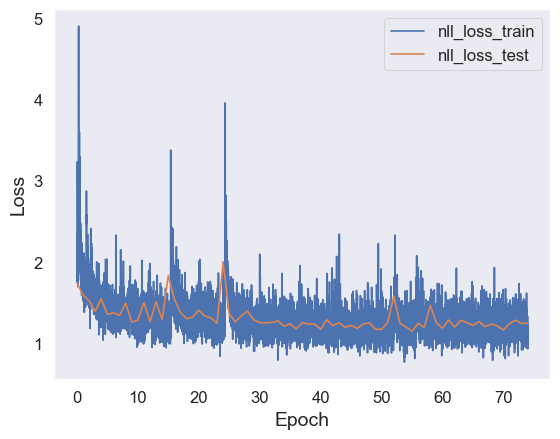

In [341]:
# train
train_losses, test_losses = train_model(
    model, train_loader, test_loader, epochs=EPOCHS, lr=LR, loss_key='nll_loss', 
    use_cuda=USE_CUDA, use_tqdm=True, device=device
)
plot_training_curves(train_losses, test_losses)

Let check visually that our model is correct.

Here we visualize:
* samples $\mathbf{x}$ from $p(\mathbf{x})$ - you have to get moons;
* the density $p(\mathbf{x})$ - you have to get moons;
* the points $\mathbf{z}$ from prior distribution $p(\mathbf{z})$ - it should be similar to standard normal.

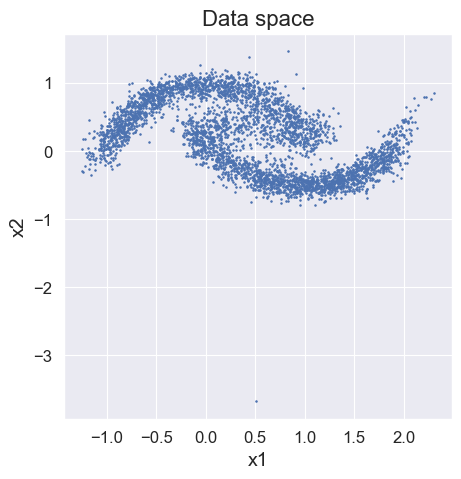

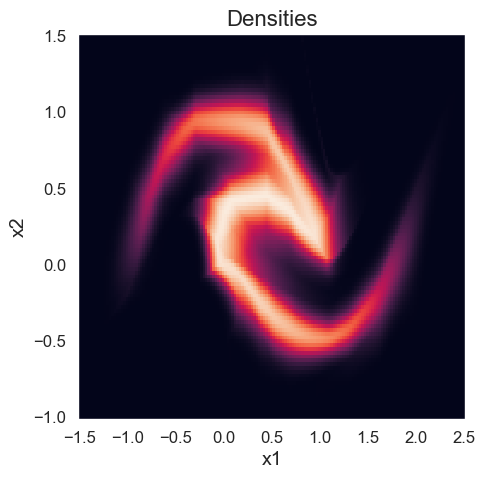

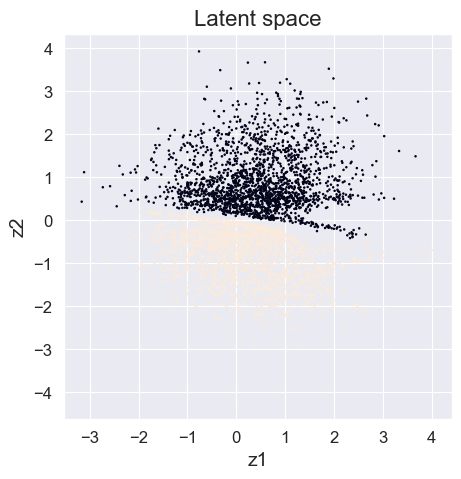

In [342]:
# Samples

x_samples = model.sample(4000).cpu().detach().numpy()
visualize_2d_samples(x_samples, title='Data space', xlabel='x1', ylabel='x2')

# Density
dx, dy = 0.025, 0.025
x_lim = (-1.5, 2.5)
y_lim = (-1, 1.5)
y, x = np.mgrid[slice(y_lim[0], y_lim[1] + dy, dy),
                slice(x_lim[0], x_lim[1] + dx, dx)]
mesh_xs = torch.FloatTensor(np.stack([x, y], axis=2).reshape(-1, 2))

if USE_CUDA:
    mesh_xs = mesh_xs.cuda()

mesh_xs = mesh_xs.to(device)
densities = np.exp(model.log_prob(mesh_xs).cpu().detach().numpy())

# Latents
train_tensor = torch.FloatTensor(train_data)
if USE_CUDA:
    train_tensor = train_tensor.cuda()

train_tensor = train_tensor.to(device)
z = model(train_tensor)[0]
latents = z.cpu().detach().numpy()

visualize_2d_densities(x, y, densities, title='Densities', xlabel='x1', ylabel='x2')
visualize_2d_samples(latents, title='Latent space', labels=train_labels, xlabel='z1', ylabel='z2')

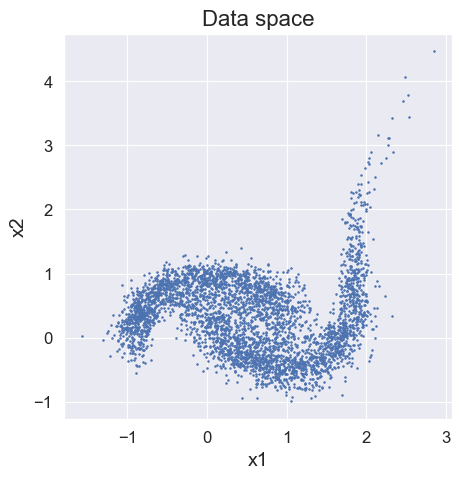

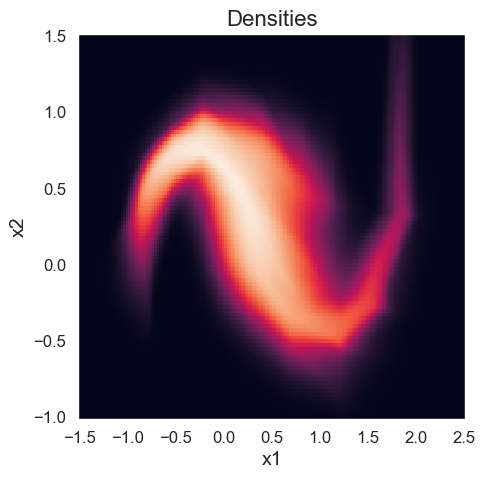

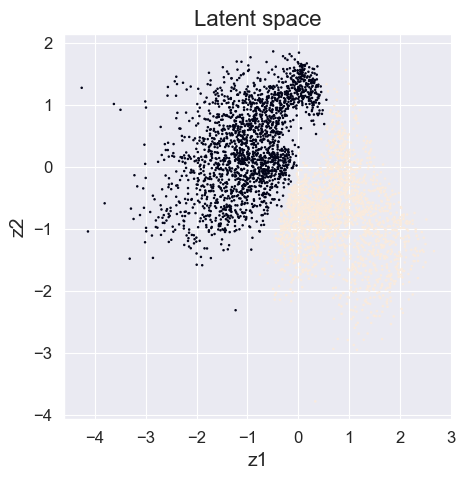

In [313]:
# Samples

x_samples = model.sample(4000).cpu().detach().numpy()
visualize_2d_samples(x_samples, title='Data space', xlabel='x1', ylabel='x2')

# Density
dx, dy = 0.025, 0.025
x_lim = (-1.5, 2.5)
y_lim = (-1, 1.5)
y, x = np.mgrid[slice(y_lim[0], y_lim[1] + dy, dy),
                slice(x_lim[0], x_lim[1] + dx, dx)]
mesh_xs = torch.FloatTensor(np.stack([x, y], axis=2).reshape(-1, 2))

if USE_CUDA:
    mesh_xs = mesh_xs.cuda()

mesh_xs = mesh_xs.to(device)
densities = np.exp(model.log_prob(mesh_xs).cpu().detach().numpy())

# Latents
train_tensor = torch.FloatTensor(train_data)
if USE_CUDA:
    train_tensor = train_tensor.cuda()

train_tensor = train_tensor.to(device)
z = model(train_tensor)[0]
latents = z.cpu().detach().numpy()

visualize_2d_densities(x, y, densities, title='Densities', xlabel='x1', ylabel='x2')
visualize_2d_samples(latents, title='Latent space', labels=train_labels, xlabel='z1', ylabel='z2')

## Task 3: RealNVP on MNIST (5pt)

In this task you will implement the [RealNVP](https://arxiv.org/abs/1605.08803) for MNIST dataset. 

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

import seaborn as sns
sns.set_theme("paper")

device = torch.device("mps")

import sys
sys.path.append('../../homeworks')

from dgm_utils import train_model, plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples, visualize_2d_densities
from dgm_utils import show_samples, visualize_images, load_dataset

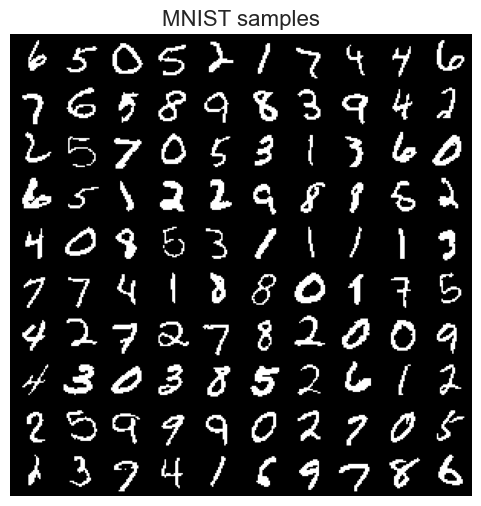

In [14]:
train_data, test_data = load_dataset('mnist', flatten=False, binarize=True)
visualize_images(train_data, 'MNIST samples')

In [15]:
train_data.shape

(60000, 1, 28, 28)

Please note that our data is discrete, and, moreover, it is binary. 

In this task for the neural networks $s(\cdot)$ and $t(\cdot)$ we will use the ResNet-like network. The model will consist stack of Residual blocks:
$$
    \mathbf{y} = \mathbf{x} + f(\mathbf{x}).
$$

In [16]:
class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(dim, dim, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=1)
        )

    def forward(self, x):
        return x + self.block(x)


class SimpleResnet(nn.Module):
    def __init__(self, in_channels, out_channels, n_filters, n_blocks):
        super().__init__()
        layers = [
            nn.Conv2d(in_channels, n_filters, kernel_size=3, padding=1),
            nn.ReLU()
        ]
        for _ in range(n_blocks):
            layers.append(ResnetBlock(n_filters))
        layers.extend([
            nn.ReLU(),
            nn.Conv2d(n_filters, out_channels, kernel_size=3, padding=1)
        ])
        self.resnet = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)

We have to implement coupling layer for images. To split image in two parts we will you checkerboard and chanelwise splitting (see image below).

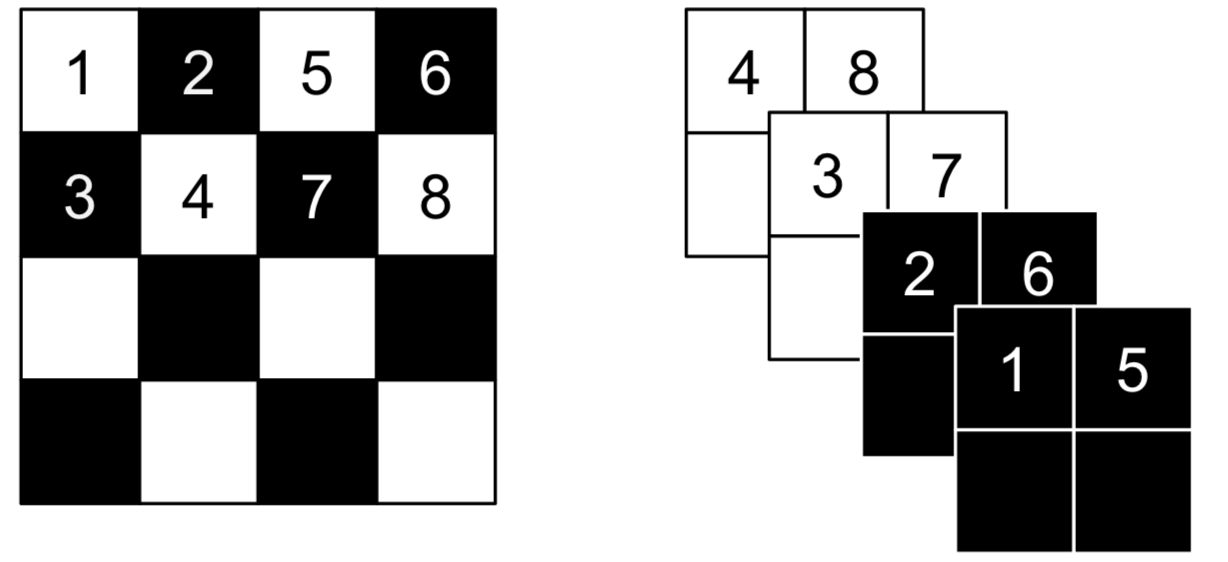

Firstly, let implement checkerboard splitting.

In [17]:
class AffineCheckerboardCouplingLayer(nn.Module):
    def __init__(self, parity_type, input_shape, in_channels=3, n_filters=32, n_blocks=4):
        assert isinstance(parity_type, bool)
        super().__init__()
        self.input_shape = input_shape
        self.parity_type = parity_type
        self.mask = self.build_mask()
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)

        # ====
        # your code
        # define resnet that will output s() and t()
        net = [SimpleResnet(in_channels, 2*in_channels, n_filters, n_blocks), 
              ]
        self.net = nn.Sequential(*net)
        # ====

    def build_mask(self):
        # ====
        # your code
        # return checkerboard mask
        # if parity_type == True, the top left corner will be 1.0
        # if parity_type == False, the top left corner will be 0.0
        n = np.prod( self.input_shape[:-1]) // 2
        r = self.input_shape[-1] // 2
        mask = np.array([[1.*self.parity_type, 1. - self.parity_type]*r +
                         [1. - self.parity_type, 1.*self.parity_type]*r
                         ]*n).reshape((1, 1, *self.input_shape)) 
        # ====
        assert mask.shape[1:] == (1, *self.input_shape)
        return torch.tensor(mask.astype('float32'))

    def forward(self, x, invert=False):
        batch_size = x.shape[0]
        n_channels = x.shape[1]
        mask = self.mask.repeat(batch_size, 1, 1, 1).to(device)
        # ====
        # your code
        # 1) mask tensor x
        # 2) apply resnet to masked x
        # 3) split resnet output to get s and t
        
        x_masked = x*mask
        s, t = self.net(x_masked).chunk(2, dim=1)

        # ====

        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        
        t = t * (1.0 - mask)
        s = s * (1.0 - mask)

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform
        if not invert:
            x = t + x*torch.exp(s)
        else:
            x = (x - t)*torch.exp(-s)
        # ====
        return x, s
        
        
def test_affine_checkerboard_coupling_layer():
    x = torch.zeros((1, 1, 2, 2), dtype=torch.float32).to(device)

    layer = AffineCheckerboardCouplingLayer(parity_type=True, input_shape=(2, 2), in_channels=1, n_filters=4, n_blocks=1).to(device)
    mask = np.array([[1, 0], [0, 1]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 1, 2, 2)
    assert tuple(out2.size()) == (1, 1, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((2, 2)))

    layer = AffineCheckerboardCouplingLayer(parity_type=False, input_shape=(2, 2), in_channels=1, n_filters=4, n_blocks=1).to(device)
    mask = np.array([[0, 1], [1, 0]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 1, 2, 2)
    assert tuple(out2.size()) == (1, 1, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((2, 2)))


test_affine_checkerboard_coupling_layer()

Secodly, let implement channelwise splitting.

In [18]:
class AffineChannelCouplingLayer(nn.Module):
    def __init__(self, parity_type, in_channels=6, n_filters=32, n_blocks=4):
        assert isinstance(parity_type, bool)
        super().__init__()
        self.parity_type = parity_type
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        # ====
        # your code
        # define resnet that will output s() and t()
        self.in_channels = in_channels
        net = [SimpleResnet(self.in_channels, self.in_channels, n_filters, n_blocks), 
               nn.Flatten(),
              ]

        self.net = nn.Sequential(*net)
        # ====
 
    def forward(self, x, invert=False):

        # ====
        # your code
        # 1) split x to two equal parts by channel dimension (dim=1)
        # 2) apply resnet to masked x
        # 3) split resnet output to get s and t

        m = x.shape[1] // 2
        
        x_split_0 = x[:, :m, :, :]
        x_split_1 = x[:, m:, :, :]
        zeros = torch.zeros(x_split_1.shape).to(device)
        
        if self.parity_type:
            x_id, x_change = x.chunk(2, dim=1)
        else:
            x_change, x_id = x.chunk(2, dim=1)
        
        
        s, t = self.net(x_id).chunk(2, dim=1)
        
        # ====

        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        
        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform
        
        n = int(np.sqrt(s.shape[-1]))
        s = s.reshape((x.shape[0], 1, n, n)).repeat((1, 2, 1, 1))
        t = t.reshape((x.shape[0], 1, n, n)).repeat((1, 2, 1, 1))

        if not invert:
            # z = f(x)
            z = t + x_change*torch.exp(s)
        else:
            # x = g(z)
            z = (x_change - t)*torch.exp(-s)
        # ====
        
        # look carefully at this piece of code
        if self.parity_type:
            return torch.cat([z, x_id], dim=1), torch.cat([s, torch.zeros_like(s)], dim=1)
        else:
            return torch.cat([x_id, z], dim=1), torch.cat([torch.zeros_like(s), s], dim=1)


def test_affine_channel_coupling_layer():
    x = torch.zeros((1, 4, 2, 2), dtype=torch.float32).to(device)

    layer = AffineChannelCouplingLayer(parity_type=True, in_channels=2, n_filters=4, n_blocks=1).to(device)
    mask = np.array([[[0, 0], [0, 0]], [[0, 0], [0, 0]], [[1, 1], [1, 1]], [[1, 1], [1, 1]]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 4, 2, 2)
    assert tuple(out2.size()) == (1, 4, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0] * mask, np.zeros((4, 2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((4, 2, 2)))

    layer = AffineChannelCouplingLayer(parity_type=False, in_channels=2, n_filters=4, n_blocks=1).to(device)
    mask = np.array([[[1, 1], [1, 1]], [[1, 1], [1, 1]], [[0, 0], [0, 0]], [[0, 0], [0, 0]]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 4, 2, 2)
    assert tuple(out2.size()) == (1, 4, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((4, 2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((4, 2, 2)))
    

test_affine_channel_coupling_layer()

We will use the following normalization layer for more stable training. Look carefully at the class below (do not chage it).

In [19]:
class ActNormLayer(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x, invert=False):
        if invert:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = - torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(1, self.n_channels, 1, 1))
                self.initialized = True
                result = x * torch.exp(self.log_scale) + self.shift
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

Our data is discrete and binary. The normalizing flow model works with continuous data (it is a requirement of CoV theorem).

Therefore, we have to convert our discrete data to continuous one. This process is called dequantization. We will address it later in course.

To dequantize the discrete variable $x \in \{0, 1, \dots, K - 1\}$ we add uniform noise to it:
$$
    y = x + u, \quad u \sim \text{Uniform}[0, 1].
$$

Then random variable $y \in [0, K]$ will be continuous and in fact similar to $x$.

Let implement simple function for such dequantization.

In [20]:
def dequantize(x, nbins=256):
    return (x * (nbins - 1) + torch.distributions.Uniform(0.0, 1.0).sample(x.shape).to(x.device)) / nbins


def test_dequantize():
    x = torch.tensor((0, 1, 2, 3)) / 256.0
    y = dequantize(x).cpu().detach().numpy()
    x = x.cpu().detach().numpy()
    assert y.min() >= 0.0
    assert y.max() <= 4 / 256.0
    assert (y[3] > y[2]) and (y[2] > y[1]) and (y[1] > y[0])
    assert (y[3] > x[3]) and (y[2] > x[2]) and (y[1] > x[1]) and (y[0] > x[0])

test_dequantize()

The second issue that we will address here is the boundedness of the image domain. It is more natural for the model to fit the data from the range $(-\infty, +\infty)$. 

The most natural way to convert $(-\infty, +\infty)$ range to the $[0, 1]$ is to apply sigmoid function. But here we need the inverse transform from [0, 1] range (it is normalized dequantized images) to $(-\infty, +\infty)$. So we need to apply inverse sigmoid function. This function is called logit:
$$
    \text{logit}(x) = \log \left( \frac{x}{1 - x} \right) = \log (x) - \log (1 - x).
$$

The last note here is the stability of this transform. To make it stable the common practice is to convert [0, 1] range to the $[\alpha, 1 - \alpha]$ firstly:
$$
    \text{logit}(x) = \log (y) - \log (1 - y), \quad \text{where } y = \alpha + (1 - 2 * \alpha) * x.
$$

Also we need the logarithm of the Jacobian' determinant for this transform. We implement this for you, but we really encourage you to check that the formula in the code is correct for better understanding.

In [21]:
class LogitTransform(nn.Module):
    def __init__(self, alpha=0.05, dequantize=True, nbins=256):
        super().__init__()
        self.alpha = alpha
        self.dequantize = dequantize
        self.nbins = nbins

    def forward(self, x, invert=False):
        if invert:  
            #log_det = - x - 2 * F.softplus(-x) - torch.log(torch.tensor(1 - 2 *  self.alpha))
            log_det = - x - 2 * torch.log(1 + torch.exp(-x)) - torch.log(torch.tensor(1 - 2 *  self.alpha))
            x = (torch.sigmoid(x) - self.alpha) / (1 - 2 * self.alpha)
        else:
            # dequantization
            if self.dequantize:
                x = dequantize(x, nbins=self.nbins)

            # ====
            # your code
            # 1) scale the data to [alpha, 1 - alpha range] (save the result to x_scaled)
            # 2) apply logit operation that described above (save the result to x)
            x_scaled = self.alpha + (1 - 2 * self.alpha) * x
            x = torch.log(x_scaled) - torch.log(1 - x_scaled)
            # ====

            # look carefully at this expression, try to understand this formula
            log_det = - torch.log(x_scaled) - torch.log(1.0 - x_scaled) + torch.log(torch.tensor(1 - 2 * self.alpha))
        return x, log_det


def test_logit_transform():
    layer = LogitTransform(dequantize=False)
    x = torch.tensor((0, 1, 2, 3)) / 256.0
    z, log_det = layer(x)
    assert np.allclose(z.cpu().detach().numpy(), np.array([-2.944439, -2.8727808, -2.8054335, -2.7418802]))
    assert np.allclose(log_det.cpu().detach().numpy(), np.array([2.9416652, 2.8774219, 2.8175175, 2.7614343]))

    x_restored, log_det2 = layer(z, invert=True)
    assert np.allclose(x.cpu().detach().numpy(), x_restored.cpu().detach().numpy())


test_logit_transform()

Not it is time to define the final model.

The model will consist of several blocks:

1. Logit Transform (to convert the data to $(-\infty, \infty)$ range).
2. Stack of checkerboard coupling layers.
3. Squeeze operation (convert tensor $[B, C, H, W]$ to $[B, 4 * C, H / 2, W / 2]$).
4. Stack of channelwise coupling layers
5. Unsqueeze operation (convert tensor $[B, C, H, W]$ to $[B, C / 4, 2 * H, 2 * W]$).
2. Stack of checkerboard coupling layers.

In [42]:
class RealNVP(nn.Module):
    def __init__(self, input_shape, n_channels, n_filters, n_blocks, nbins=256):
        super().__init__()
        self.input_shape = input_shape
        self.n_channels = n_channels
        self.nbins = nbins

        self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        self.logit_transform = LogitTransform(nbins=nbins, dequantize=True)

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        
        steps = []
        for parity_type in [False, True, False, True]:
            steps.append(AffineCheckerboardCouplingLayer(parity_type, 
                                                                input_shape, 
                                                                in_channels=n_channels, 
                                                                n_filters=n_filters,
                                                                n_blocks= n_blocks))
            steps.append(ActNormLayer(n_channels=n_channels))
        self.transforms1 = nn.Sequential(*steps)
        # ====

        # ====
        # your code
        # define stack of channel coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        
        steps = []
        for parity_type in [False, True, False, True]:
            steps.append(AffineChannelCouplingLayer(parity_type, 
                                                 in_channels=2*n_channels, 
                                                 n_filters=n_filters, n_blocks=n_blocks))
            steps.append(ActNormLayer(n_channels=4*n_channels))
        self.transforms2 = nn.Sequential(*steps)
        # ====
        
        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        steps = []
        for parity_type in [False, True, False, True]:
            steps.append(AffineCheckerboardCouplingLayer(parity_type, 
                                                                input_shape, 
                                                                in_channels=n_channels, 
                                                                n_filters=n_filters,
                                                                n_blocks= n_blocks))
            steps.append(ActNormLayer(n_channels=self.n_channels))
        self.transforms3 = nn.Sequential(*steps)
        # ====
        
    def squeeze(self, x):
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def undo_squeeze(self, x):
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x

    def forward(self, x, invert=False):
        z = x
        log_det = torch.zeros_like(x)
        if invert:
            for op in reversed(self.transforms3):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det 
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in reversed(self.transforms2):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det 
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in reversed(self.transforms1):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            
            z, delta_log_det = self.logit_transform(z, invert=True)
            log_det += delta_log_det
        else:
            z, delta_log_det = self.logit_transform(z)
            log_det += delta_log_det
            for op in self.transforms1:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in self.transforms2:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in self.transforms3:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
        
        return z, log_det

    def log_prob(self, x):
        # ====
        # your code
        # 1) make forward pass with right inverse flag
        # 2) sum log_det with log of base distribution (log p(z))
        # 3) we will get tensor of shape [batch_size, 3, H, W] - sum it over the the last 3 dimensions
        
        z, log_det = self(x, invert=False)
        ll = self.prior.log_prob(z)
        return torch.sum(ll + log_det, dim=(1, 2, 3))
        # ====

    def loss(self, x):
        l = -self.log_prob(x).mean()
        print(l)
        return {'nll_loss': l}

    def sample(self, num_samples):
        # Look carefully at this piece of code (do not change)
        z = self.prior.sample([num_samples, self.n_channels, *self.input_shape])
        samples = self.forward(z, invert=True)[0]
        samples = samples.cpu().detach().numpy()
        samples = np.floor(np.clip(samples * self.nbins, 0.0, self.nbins - 1)) / (self.nbins - 1)
        return samples

Let train this model :)

In our case it took about 30-60 minutes to get appropriate samples.

In [46]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 256 # any adequate value
LR = 0.001        # <= 1e-3
EPOCHS = 20    # <= 20
N_FILTERS = 96  # < 128
N_BLOCKS = 6  # < 8
# ====

loader_args = dict(batch_size=BATCH_SIZE, shuffle=True)
train_loader = data.DataLoader(train_data, **loader_args)
test_loader = data.DataLoader(test_data, **loader_args)

# model
model = RealNVP(input_shape=(28, 28), n_channels=1, n_filters=N_FILTERS, n_blocks=N_BLOCKS, nbins=2)

  0%|                                                    | 0/10 [00:00<?, ?it/s]

tensor(-113.0531, device='mps:0', grad_fn=<NegBackward0>)
tensor(-96.1892, device='mps:0', grad_fn=<NegBackward0>)
tensor(95.0943, device='mps:0', grad_fn=<NegBackward0>)
tensor(-158.9410, device='mps:0', grad_fn=<NegBackward0>)
tensor(-133.3886, device='mps:0', grad_fn=<NegBackward0>)
tensor(-185.0238, device='mps:0', grad_fn=<NegBackward0>)
tensor(-192.2137, device='mps:0', grad_fn=<NegBackward0>)
tensor(-181.4837, device='mps:0', grad_fn=<NegBackward0>)
tensor(-205.5652, device='mps:0', grad_fn=<NegBackward0>)
tensor(-216.6195, device='mps:0', grad_fn=<NegBackward0>)
tensor(-210.5506, device='mps:0', grad_fn=<NegBackward0>)
tensor(-204.1393, device='mps:0', grad_fn=<NegBackward0>)
tensor(-218.9230, device='mps:0', grad_fn=<NegBackward0>)
tensor(-236.0768, device='mps:0', grad_fn=<NegBackward0>)
tensor(-237.2702, device='mps:0', grad_fn=<NegBackward0>)
tensor(-232.1750, device='mps:0', grad_fn=<NegBackward0>)
tensor(-237.7757, device='mps:0', grad_fn=<NegBackward0>)
tensor(-244.5972,

tensor(-344.4674, device='mps:0', grad_fn=<NegBackward0>)
tensor(-344.5875, device='mps:0', grad_fn=<NegBackward0>)
tensor(-345.2205, device='mps:0', grad_fn=<NegBackward0>)
tensor(-344.6242, device='mps:0', grad_fn=<NegBackward0>)
tensor(-348.5228, device='mps:0', grad_fn=<NegBackward0>)
tensor(-347.0729, device='mps:0', grad_fn=<NegBackward0>)
tensor(-340.9598, device='mps:0', grad_fn=<NegBackward0>)
tensor(-345.5956, device='mps:0', grad_fn=<NegBackward0>)
tensor(-336.8374, device='mps:0', grad_fn=<NegBackward0>)
tensor(-335.0111, device='mps:0', grad_fn=<NegBackward0>)
tensor(-337.0232, device='mps:0', grad_fn=<NegBackward0>)
tensor(-343.5126, device='mps:0', grad_fn=<NegBackward0>)
tensor(-337.3896, device='mps:0', grad_fn=<NegBackward0>)
tensor(-344.0978, device='mps:0', grad_fn=<NegBackward0>)
tensor(-341.1278, device='mps:0', grad_fn=<NegBackward0>)
tensor(-347.2437, device='mps:0', grad_fn=<NegBackward0>)
tensor(-341.0363, device='mps:0', grad_fn=<NegBackward0>)
tensor(-344.88

 10%|████▎                                      | 1/10 [05:09<46:24, 309.40s/it]

tensor(-368.7876, device='mps:0')
tensor(-373.4491, device='mps:0')
tensor(-368.2477, device='mps:0', grad_fn=<NegBackward0>)
tensor(-371.4979, device='mps:0', grad_fn=<NegBackward0>)
tensor(-367.1982, device='mps:0', grad_fn=<NegBackward0>)
tensor(-371.0289, device='mps:0', grad_fn=<NegBackward0>)
tensor(-372.9160, device='mps:0', grad_fn=<NegBackward0>)
tensor(-365.6313, device='mps:0', grad_fn=<NegBackward0>)
tensor(-365.2208, device='mps:0', grad_fn=<NegBackward0>)
tensor(-362.3210, device='mps:0', grad_fn=<NegBackward0>)
tensor(-364.7735, device='mps:0', grad_fn=<NegBackward0>)
tensor(-371.8911, device='mps:0', grad_fn=<NegBackward0>)
tensor(-370.9846, device='mps:0', grad_fn=<NegBackward0>)
tensor(-368.2040, device='mps:0', grad_fn=<NegBackward0>)
tensor(-372.0828, device='mps:0', grad_fn=<NegBackward0>)
tensor(-368.2365, device='mps:0', grad_fn=<NegBackward0>)
tensor(-366.7336, device='mps:0', grad_fn=<NegBackward0>)
tensor(-371.7419, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-389.7961, device='mps:0', grad_fn=<NegBackward0>)
tensor(-389.5606, device='mps:0', grad_fn=<NegBackward0>)
tensor(-387.4955, device='mps:0', grad_fn=<NegBackward0>)
tensor(-384.7022, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.7661, device='mps:0', grad_fn=<NegBackward0>)
tensor(-387.5027, device='mps:0', grad_fn=<NegBackward0>)
tensor(-386.4381, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.1584, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.3230, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.2839, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.5581, device='mps:0', grad_fn=<NegBackward0>)
tensor(-386.7781, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.6913, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.4241, device='mps:0', grad_fn=<NegBackward0>)
tensor(-391.7724, device='mps:0', grad_fn=<NegBackward0>)
tensor(-389.9431, device='mps:0', grad_fn=<NegBackward0>)
tensor(-391.3159, device='mps:0', grad_fn=<NegBackward0>)
tensor(-390.04

 20%|████████▌                                  | 2/10 [10:18<41:13, 309.18s/it]

tensor(-392.6843, device='mps:0')
tensor(-397.4608, device='mps:0')
tensor(-395.9656, device='mps:0', grad_fn=<NegBackward0>)
tensor(-394.0257, device='mps:0', grad_fn=<NegBackward0>)
tensor(-396.9319, device='mps:0', grad_fn=<NegBackward0>)
tensor(-396.7172, device='mps:0', grad_fn=<NegBackward0>)
tensor(-396.3540, device='mps:0', grad_fn=<NegBackward0>)
tensor(-392.8830, device='mps:0', grad_fn=<NegBackward0>)
tensor(-396.4027, device='mps:0', grad_fn=<NegBackward0>)
tensor(-397.6768, device='mps:0', grad_fn=<NegBackward0>)
tensor(-393.9786, device='mps:0', grad_fn=<NegBackward0>)
tensor(-393.3373, device='mps:0', grad_fn=<NegBackward0>)
tensor(-393.9607, device='mps:0', grad_fn=<NegBackward0>)
tensor(-395.6746, device='mps:0', grad_fn=<NegBackward0>)
tensor(-393.3643, device='mps:0', grad_fn=<NegBackward0>)
tensor(-396.5844, device='mps:0', grad_fn=<NegBackward0>)
tensor(-395.2635, device='mps:0', grad_fn=<NegBackward0>)
tensor(-395.5067, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-402.0005, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.4178, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.1663, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.4746, device='mps:0', grad_fn=<NegBackward0>)
tensor(-401.0685, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.3349, device='mps:0', grad_fn=<NegBackward0>)
tensor(-399.6790, device='mps:0', grad_fn=<NegBackward0>)
tensor(-401.0109, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.5611, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.0053, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.6937, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.8105, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.4465, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.5255, device='mps:0', grad_fn=<NegBackward0>)
tensor(-400.9366, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.6877, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.2712, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.51

 30%|████████████▉                              | 3/10 [15:27<36:02, 308.94s/it]

tensor(-402.2975, device='mps:0')
tensor(-409.0865, device='mps:0')
tensor(-403.9339, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.0753, device='mps:0', grad_fn=<NegBackward0>)
tensor(-401.2310, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.5573, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.8773, device='mps:0', grad_fn=<NegBackward0>)
tensor(-401.5336, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.1896, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.5506, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.3182, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.8443, device='mps:0', grad_fn=<NegBackward0>)
tensor(-401.9058, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.5877, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.6053, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.7903, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.3143, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.4233, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-406.1743, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.4394, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.8414, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.2578, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.5357, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.1729, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.6320, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.4991, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.7090, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.6502, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.5972, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.0723, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.0582, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.5428, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.5607, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.0093, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.0225, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.35

 40%|█████████████████▏                         | 4/10 [20:36<30:54, 309.15s/it]

tensor(-412.0517, device='mps:0')
tensor(-403.2699, device='mps:0')
tensor(-409.8472, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.2180, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.6102, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.6325, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.3382, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.1062, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.2931, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.3960, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.8531, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.3666, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.0931, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.3549, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.7305, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.9081, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.7514, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.7237, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-412.9015, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.0095, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.7318, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.8583, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.1283, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.5070, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.8826, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.4223, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.5004, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.4937, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.4062, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.4035, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.0129, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.8714, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.4254, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.2206, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.4289, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.54

 50%|█████████████████████▌                     | 5/10 [25:45<25:46, 309.25s/it]

tensor(-416.9121, device='mps:0')
tensor(-412.6325, device='mps:0')
tensor(-412.7654, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.1824, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.1622, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.0151, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.6763, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.3669, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.7702, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.8787, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.8032, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.2912, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.0533, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.1791, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.8617, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.0123, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.0273, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.8066, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-416.8936, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.0667, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.0618, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.4106, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.6868, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.7512, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.7004, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.2297, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.2377, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.7785, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.4847, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.8568, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.6580, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.4445, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.6668, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.7785, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.5087, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.08

 60%|█████████████████████████▊                 | 6/10 [30:55<20:37, 309.26s/it]

tensor(-419.0419, device='mps:0')
tensor(-417.7979, device='mps:0')
tensor(-419.4367, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.4039, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.5058, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.3353, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.2272, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.0358, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.9767, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.0287, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.4304, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.2435, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.5957, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.0053, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.9459, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.2317, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.3532, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.3698, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-419.4543, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.6718, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.5460, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.8954, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.9998, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.9132, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.4630, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.5846, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.2704, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.0757, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.5890, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.5465, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.3059, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.9780, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.2642, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.5175, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.3932, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.95

 70%|██████████████████████████████             | 7/10 [36:04<15:27, 309.17s/it]

tensor(-423.6888, device='mps:0')
tensor(-430.1414, device='mps:0')
tensor(-419.9501, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1911, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.1721, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.2196, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1270, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.7526, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.2000, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1316, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.8023, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1807, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.0971, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.3029, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.3669, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.3683, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.7707, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.0528, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-420.5842, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.9935, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.8640, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.9393, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9647, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.7542, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.7417, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.1594, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.7749, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.3110, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.4159, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.0901, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.3034, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.6950, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.5777, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.2652, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.9793, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.00

 80%|██████████████████████████████████▍        | 8/10 [41:14<10:18, 309.39s/it]

tensor(-417.9292, device='mps:0')
tensor(-419.6649, device='mps:0')
tensor(-418.1854, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.5445, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.2614, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.0613, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.6991, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.1603, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.2120, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.1893, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.2206, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.9723, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.1367, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.6308, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.3752, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.8048, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.9017, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.9788, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-423.4650, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.9372, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.7838, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6689, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.5421, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.1049, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.0266, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.0298, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.3381, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.5187, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.6161, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.7467, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.8944, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.3314, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.0324, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.2657, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.0176, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.89

 90%|██████████████████████████████████████▋    | 9/10 [46:22<05:09, 309.18s/it]

tensor(-427.8971, device='mps:0')
tensor(-419.7433, device='mps:0')
tensor(-425.4744, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.3644, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.5108, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.7953, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.5666, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.6725, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.4630, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.2638, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.4829, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.4750, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.5726, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.0137, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.8869, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9264, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6878, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.4686, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-425.6798, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.1765, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.9186, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.2714, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.2906, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.1876, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9275, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.8575, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.5304, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.4208, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.5403, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.3455, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6424, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.4922, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.2328, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.3111, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.2548, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.71

100%|██████████████████████████████████████████| 10/10 [51:33<00:00, 309.35s/it]

tensor(-428.2313, device='mps:0')
tensor(-424.9295, device='mps:0')


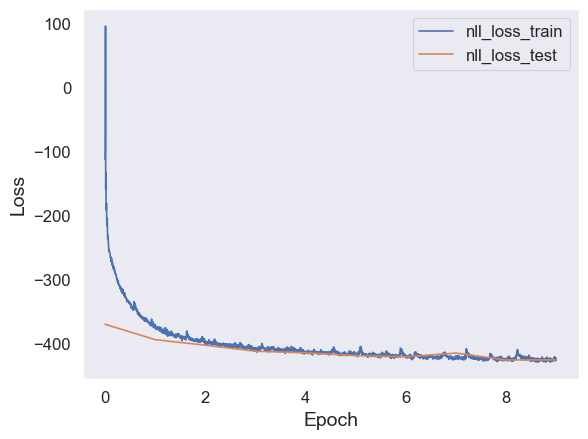

CPU times: user 21min 26s, sys: 3min 36s, total: 25min 3s
Wall time: 51min 33s


In [44]:
%%time
# train
train_losses, test_losses = train_model(
    model, train_loader, test_loader, epochs=EPOCHS, lr=LR, loss_key='nll_loss', 
    use_cuda=USE_CUDA, use_tqdm=True, device=device
)
plot_training_curves(train_losses, test_losses)

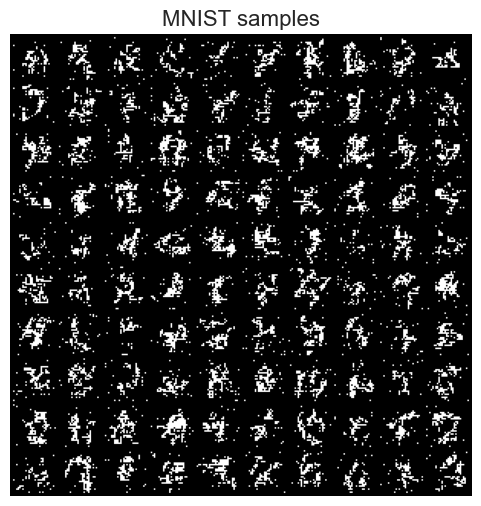

In [45]:
samples = model.sample(100)
show_samples(samples, 'MNIST samples')

  0%|                                                    | 0/20 [00:00<?, ?it/s]

tensor(-106.6865, device='mps:0', grad_fn=<NegBackward0>)
tensor(1011.2626, device='mps:0', grad_fn=<NegBackward0>)
tensor(-45.8619, device='mps:0', grad_fn=<NegBackward0>)
tensor(102.7780, device='mps:0', grad_fn=<NegBackward0>)
tensor(-37.7176, device='mps:0', grad_fn=<NegBackward0>)
tensor(-136.7933, device='mps:0', grad_fn=<NegBackward0>)
tensor(-171.6085, device='mps:0', grad_fn=<NegBackward0>)
tensor(-149.3942, device='mps:0', grad_fn=<NegBackward0>)
tensor(-152.4109, device='mps:0', grad_fn=<NegBackward0>)
tensor(-174.4043, device='mps:0', grad_fn=<NegBackward0>)
tensor(-183.2801, device='mps:0', grad_fn=<NegBackward0>)
tensor(-182.3433, device='mps:0', grad_fn=<NegBackward0>)
tensor(-188.7700, device='mps:0', grad_fn=<NegBackward0>)
tensor(-198.0068, device='mps:0', grad_fn=<NegBackward0>)
tensor(-201.6944, device='mps:0', grad_fn=<NegBackward0>)
tensor(-201.3798, device='mps:0', grad_fn=<NegBackward0>)
tensor(-203.9627, device='mps:0', grad_fn=<NegBackward0>)
tensor(-208.9976,

tensor(-343.2420, device='mps:0', grad_fn=<NegBackward0>)
tensor(-346.7357, device='mps:0', grad_fn=<NegBackward0>)
tensor(-345.0261, device='mps:0', grad_fn=<NegBackward0>)
tensor(-349.5026, device='mps:0', grad_fn=<NegBackward0>)
tensor(-345.3691, device='mps:0', grad_fn=<NegBackward0>)
tensor(-346.1851, device='mps:0', grad_fn=<NegBackward0>)
tensor(-347.3502, device='mps:0', grad_fn=<NegBackward0>)
tensor(-346.9287, device='mps:0', grad_fn=<NegBackward0>)
tensor(-348.7653, device='mps:0', grad_fn=<NegBackward0>)
tensor(-347.8507, device='mps:0', grad_fn=<NegBackward0>)
tensor(-352.3313, device='mps:0', grad_fn=<NegBackward0>)
tensor(-349.1767, device='mps:0', grad_fn=<NegBackward0>)
tensor(-353.6669, device='mps:0', grad_fn=<NegBackward0>)
tensor(-352.5663, device='mps:0', grad_fn=<NegBackward0>)
tensor(-348.1795, device='mps:0', grad_fn=<NegBackward0>)
tensor(-352.3771, device='mps:0', grad_fn=<NegBackward0>)
tensor(-347.7395, device='mps:0', grad_fn=<NegBackward0>)
tensor(-353.93

  5%|█▊                                   | 1/20 [2:22:11<45:01:33, 8531.23s/it]

tensor(-350.2031, device='mps:0')
tensor(-345.2356, device='mps:0')
tensor(-348.5510, device='mps:0', grad_fn=<NegBackward0>)
tensor(-356.2883, device='mps:0', grad_fn=<NegBackward0>)
tensor(-352.4132, device='mps:0', grad_fn=<NegBackward0>)
tensor(-356.6371, device='mps:0', grad_fn=<NegBackward0>)
tensor(-355.9171, device='mps:0', grad_fn=<NegBackward0>)
tensor(-359.2878, device='mps:0', grad_fn=<NegBackward0>)
tensor(-360.5869, device='mps:0', grad_fn=<NegBackward0>)
tensor(-360.4208, device='mps:0', grad_fn=<NegBackward0>)
tensor(-362.4184, device='mps:0', grad_fn=<NegBackward0>)
tensor(-360.4716, device='mps:0', grad_fn=<NegBackward0>)
tensor(-362.4893, device='mps:0', grad_fn=<NegBackward0>)
tensor(-360.0908, device='mps:0', grad_fn=<NegBackward0>)
tensor(-363.9902, device='mps:0', grad_fn=<NegBackward0>)
tensor(-363.3720, device='mps:0', grad_fn=<NegBackward0>)
tensor(-362.3230, device='mps:0', grad_fn=<NegBackward0>)
tensor(-363.8033, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-384.8116, device='mps:0', grad_fn=<NegBackward0>)
tensor(-384.0472, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.0244, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.6234, device='mps:0', grad_fn=<NegBackward0>)
tensor(-384.8508, device='mps:0', grad_fn=<NegBackward0>)
tensor(-384.8702, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.1172, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.0722, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.2428, device='mps:0', grad_fn=<NegBackward0>)
tensor(-383.7733, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.5493, device='mps:0', grad_fn=<NegBackward0>)
tensor(-385.1810, device='mps:0', grad_fn=<NegBackward0>)
tensor(-384.1749, device='mps:0', grad_fn=<NegBackward0>)
tensor(-383.2549, device='mps:0', grad_fn=<NegBackward0>)
tensor(-378.1525, device='mps:0', grad_fn=<NegBackward0>)
tensor(-382.1349, device='mps:0', grad_fn=<NegBackward0>)
tensor(-381.9473, device='mps:0', grad_fn=<NegBackward0>)
tensor(-383.54

 10%|███▋                                 | 2/20 [2:32:08<19:19:11, 3863.97s/it]

tensor(-394.0429, device='mps:0')
tensor(-385.4866, device='mps:0')
tensor(-392.0875, device='mps:0', grad_fn=<NegBackward0>)
tensor(-388.4197, device='mps:0', grad_fn=<NegBackward0>)
tensor(-392.5580, device='mps:0', grad_fn=<NegBackward0>)
tensor(-395.8804, device='mps:0', grad_fn=<NegBackward0>)
tensor(-393.5571, device='mps:0', grad_fn=<NegBackward0>)
tensor(-392.4898, device='mps:0', grad_fn=<NegBackward0>)
tensor(-391.3070, device='mps:0', grad_fn=<NegBackward0>)
tensor(-389.8134, device='mps:0', grad_fn=<NegBackward0>)
tensor(-392.0366, device='mps:0', grad_fn=<NegBackward0>)
tensor(-393.4131, device='mps:0', grad_fn=<NegBackward0>)
tensor(-386.9903, device='mps:0', grad_fn=<NegBackward0>)
tensor(-390.7252, device='mps:0', grad_fn=<NegBackward0>)
tensor(-392.1717, device='mps:0', grad_fn=<NegBackward0>)
tensor(-394.2590, device='mps:0', grad_fn=<NegBackward0>)
tensor(-390.6318, device='mps:0', grad_fn=<NegBackward0>)
tensor(-391.2459, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-400.7902, device='mps:0', grad_fn=<NegBackward0>)
tensor(-398.0756, device='mps:0', grad_fn=<NegBackward0>)
tensor(-398.2370, device='mps:0', grad_fn=<NegBackward0>)
tensor(-397.6803, device='mps:0', grad_fn=<NegBackward0>)
tensor(-399.0826, device='mps:0', grad_fn=<NegBackward0>)
tensor(-401.2664, device='mps:0', grad_fn=<NegBackward0>)
tensor(-399.9414, device='mps:0', grad_fn=<NegBackward0>)
tensor(-400.0970, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.2255, device='mps:0', grad_fn=<NegBackward0>)
tensor(-398.3899, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.3142, device='mps:0', grad_fn=<NegBackward0>)
tensor(-400.5968, device='mps:0', grad_fn=<NegBackward0>)
tensor(-399.6872, device='mps:0', grad_fn=<NegBackward0>)
tensor(-400.2588, device='mps:0', grad_fn=<NegBackward0>)
tensor(-394.9920, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.5512, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.4412, device='mps:0', grad_fn=<NegBackward0>)
tensor(-400.02

 15%|█████▌                               | 3/20 [2:42:35<11:16:00, 2385.89s/it]

tensor(-406.3635, device='mps:0')
tensor(-393.7920, device='mps:0')
tensor(-406.3756, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.1101, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.3585, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.2711, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.1813, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.6586, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.6814, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.5896, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.3195, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.1635, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.5408, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.7368, device='mps:0', grad_fn=<NegBackward0>)
tensor(-402.5094, device='mps:0', grad_fn=<NegBackward0>)
tensor(-403.4708, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.6370, device='mps:0', grad_fn=<NegBackward0>)
tensor(-404.9884, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-409.2935, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.4593, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.1514, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.6443, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.2001, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.7402, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.8885, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.0644, device='mps:0', grad_fn=<NegBackward0>)
tensor(-405.8465, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.7592, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.5443, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.7256, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.0552, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.2539, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.4124, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.9153, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.3104, device='mps:0', grad_fn=<NegBackward0>)
tensor(-406.49

 20%|███████▌                              | 4/20 [2:53:16<7:32:36, 1697.30s/it]

tensor(-410.7961, device='mps:0')
tensor(-406.9487, device='mps:0')
tensor(-409.1444, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.4511, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.3212, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.2908, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.4525, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.1737, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.7742, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.0076, device='mps:0', grad_fn=<NegBackward0>)
tensor(-408.4324, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.0035, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.1123, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.2501, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.3931, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.9405, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.7769, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.3543, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-414.2414, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.1635, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.4425, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.3071, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.2263, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.2189, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.7108, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.3201, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.2783, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.7323, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.6802, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.7927, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.8699, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.5641, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.4089, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.2489, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.9534, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.80

 25%|█████████▌                            | 5/20 [3:03:34<5:27:01, 1308.11s/it]

tensor(-410.8614, device='mps:0')
tensor(-416.6461, device='mps:0')
tensor(-408.7807, device='mps:0', grad_fn=<NegBackward0>)
tensor(-410.7810, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.6624, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.0197, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.4562, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.7620, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.0926, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.4839, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.9961, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.2755, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.3901, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.4194, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.5314, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.2944, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.3981, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.3205, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-415.0987, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.2814, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.2568, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.6353, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.9973, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.2081, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.9121, device='mps:0', grad_fn=<NegBackward0>)
tensor(-407.2516, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.7548, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.1437, device='mps:0', grad_fn=<NegBackward0>)
tensor(-409.3346, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.6733, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.2716, device='mps:0', grad_fn=<NegBackward0>)
tensor(-413.8472, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.1196, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.7612, device='mps:0', grad_fn=<NegBackward0>)
tensor(-411.4034, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.94

 30%|███████████▍                          | 6/20 [3:14:21<4:12:42, 1083.06s/it]

tensor(-422.1474, device='mps:0')
tensor(-423.2030, device='mps:0')
tensor(-420.8704, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.3184, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.4335, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.9449, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1907, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.6118, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.4219, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.3485, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.3553, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.7690, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.1738, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.4096, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.7928, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.7154, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.7274, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.1941, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-416.1445, device='mps:0', grad_fn=<NegBackward0>)
tensor(-415.3616, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.8887, device='mps:0', grad_fn=<NegBackward0>)
tensor(-412.0964, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.9313, device='mps:0', grad_fn=<NegBackward0>)
tensor(-414.6317, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.6688, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.6673, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.6144, device='mps:0', grad_fn=<NegBackward0>)
tensor(-416.7464, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.6946, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.1179, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.4577, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.3569, device='mps:0', grad_fn=<NegBackward0>)
tensor(-417.4884, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.0078, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.0463, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.16

 35%|█████████████▋                         | 7/20 [3:24:39<3:21:43, 931.02s/it]

tensor(-421.8142, device='mps:0')
tensor(-421.2201, device='mps:0')
tensor(-418.9310, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.5110, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.4040, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1353, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.2928, device='mps:0', grad_fn=<NegBackward0>)
tensor(-419.3367, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.6597, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.3010, device='mps:0', grad_fn=<NegBackward0>)
tensor(-418.7800, device='mps:0', grad_fn=<NegBackward0>)
tensor(-421.1147, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.4521, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.5575, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.3405, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.3812, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.2057, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.4985, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-424.8841, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.0590, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.2615, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.7881, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.4678, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.1132, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.7314, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.8544, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.2426, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.3630, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9744, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6251, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.4261, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.6747, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.0341, device='mps:0', grad_fn=<NegBackward0>)
tensor(-420.6819, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.0547, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.09

 40%|███████████████▌                       | 8/20 [3:35:38<2:48:53, 844.49s/it]

tensor(-425.0742, device='mps:0')
tensor(-418.7939, device='mps:0')
tensor(-424.3472, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.0028, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.3997, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9467, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.0946, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.9023, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.1220, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.8973, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.0403, device='mps:0', grad_fn=<NegBackward0>)
tensor(-422.8235, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.8395, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.0453, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.5862, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.2335, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.6524, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.4276, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-423.9106, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.2847, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.5319, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.2110, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.0930, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.8503, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6689, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.5985, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.0389, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.5606, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.7505, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.7123, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.5752, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.5965, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.9445, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6881, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.2931, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.15

 45%|█████████████████▌                     | 9/20 [3:46:01<2:22:08, 775.35s/it]

tensor(-423.3375, device='mps:0')
tensor(-429.0556, device='mps:0')
tensor(-424.8152, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.4114, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.7769, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.1455, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.8138, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.4769, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9275, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.5853, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.0142, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.5252, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.9862, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.1031, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.0616, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.8624, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.7573, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6724, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-426.7144, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.6427, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.5856, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.5833, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.2987, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.1883, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.8779, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.0044, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.4637, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.4362, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.7930, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.7280, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6240, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.8743, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9176, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.7316, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.8205, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.39

 50%|███████████████████                   | 10/20 [3:56:54<2:02:56, 737.67s/it]

tensor(-424.0561, device='mps:0')
tensor(-417.0437, device='mps:0')
tensor(-424.0936, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.1559, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.8507, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.0274, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.6459, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.3206, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.2394, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.8320, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.0174, device='mps:0', grad_fn=<NegBackward0>)
tensor(-423.4540, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.7030, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.4920, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.1390, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.7051, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.1626, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.5829, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-426.4478, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.7858, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.1320, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.3988, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.8987, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.9632, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.3480, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.2134, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.6418, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.6009, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.4595, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.0336, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.3773, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.4390, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.1747, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.1700, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.2850, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.31

 55%|████████████████████▉                 | 11/20 [4:07:39<1:46:23, 709.33s/it]

tensor(-429.5167, device='mps:0')
tensor(-421.5080, device='mps:0')
tensor(-427.7131, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.0780, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.9074, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.0268, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.8573, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9927, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.9891, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.5687, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.7446, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.6747, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.6211, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.7004, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.5466, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.5529, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.7145, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.9432, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-429.3464, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.3679, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.7631, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.9343, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.7675, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.8808, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.8508, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.3979, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.9717, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.0400, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.8836, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.2516, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.6024, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.8828, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.4260, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.3474, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.5193, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.66

 60%|██████████████████████▊               | 12/20 [4:17:39<1:30:07, 675.89s/it]

tensor(-432.6230, device='mps:0')
tensor(-438.8597, device='mps:0')
tensor(-430.3810, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.9146, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.8135, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.5128, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.9007, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.2007, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.7339, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.3713, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.7158, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.7233, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.0947, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.9382, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.2912, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.8319, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.0475, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.5688, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-432.1063, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.3114, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.2847, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.9521, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.5857, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.5853, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.7944, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.5701, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.4834, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.8604, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.4215, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.1343, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.7202, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.9849, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.3978, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.9546, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.4090, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.05

 65%|████████████████████████▋             | 13/20 [4:28:03<1:17:02, 660.37s/it]

tensor(-425.3212, device='mps:0')
tensor(-428.3505, device='mps:0')
tensor(-427.9092, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.3846, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.1927, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9872, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.9987, device='mps:0', grad_fn=<NegBackward0>)
tensor(-425.7493, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.7483, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.5127, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.7877, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.0861, device='mps:0', grad_fn=<NegBackward0>)
tensor(-424.9846, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.4979, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.3324, device='mps:0', grad_fn=<NegBackward0>)
tensor(-427.9856, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.2682, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.3784, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-429.3101, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.9254, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.1498, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.5655, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.4388, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.4784, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.9835, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.6638, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.6739, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.4436, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.2482, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.5406, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.7285, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.8459, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.0357, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.5360, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.4138, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.95

 70%|██████████████████████████▌           | 14/20 [4:38:38<1:05:14, 652.47s/it]

tensor(-432.5534, device='mps:0')
tensor(-438.3184, device='mps:0')
tensor(-430.4136, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.9863, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.0195, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.3980, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.2261, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.1555, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.6916, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.0339, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.1061, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.9836, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.9509, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.3168, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.8822, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.9583, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.3517, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.4208, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-434.2330, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3436, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.7643, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3625, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.9248, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.6911, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.9515, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.1044, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.8898, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.7017, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.9094, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.8978, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.9653, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.8190, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.7290, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.3576, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3674, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.51

 75%|██████████████████████████████          | 15/20 [4:49:13<53:56, 647.25s/it]

tensor(-430.9214, device='mps:0')
tensor(-435.7457, device='mps:0')
tensor(-434.6233, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.7380, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.1053, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.3175, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.7938, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.3664, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.6081, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.9123, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.8696, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.1403, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.5122, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.2676, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.2097, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.1012, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.3779, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.2378, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-433.4563, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.8577, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.5112, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.9185, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.5137, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.9995, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.8185, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.8801, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3054, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.8591, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.4328, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.6904, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.6212, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.7946, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.2960, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.4705, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.4080, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.47

 80%|████████████████████████████████        | 16/20 [5:00:01<43:10, 647.67s/it]

tensor(-437.0997, device='mps:0')
tensor(-437.7884, device='mps:0')
tensor(-432.5812, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.3236, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.0547, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.3035, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.0328, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.7180, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.5554, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.4185, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.5959, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.9512, device='mps:0', grad_fn=<NegBackward0>)
tensor(-429.8647, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.4567, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.9630, device='mps:0', grad_fn=<NegBackward0>)
tensor(-430.4721, device='mps:0', grad_fn=<NegBackward0>)
tensor(-426.3856, device='mps:0', grad_fn=<NegBackward0>)
tensor(-428.1290, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-436.5143, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.8580, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.1634, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.4905, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.3170, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.5745, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.9697, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.4827, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.5465, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.4561, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.6778, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.3459, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.7128, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.0035, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.1756, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.2422, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.1212, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.05

 85%|██████████████████████████████████      | 17/20 [5:10:39<32:13, 644.54s/it]

tensor(-432.5599, device='mps:0')
tensor(-437.5732, device='mps:0')
tensor(-432.7430, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.6003, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.7491, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.8412, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.3312, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.7927, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3865, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.6588, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.6406, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.7238, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.5091, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.8406, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.5878, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.0867, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.4981, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.0823, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-432.6810, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.2313, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.4864, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.0659, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.6144, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.5823, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.8847, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.4546, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.5847, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.4945, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.7210, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.0867, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.4174, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.6908, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.1204, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.2887, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.7182, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.03

 90%|████████████████████████████████████    | 18/20 [5:21:04<21:17, 638.61s/it]

tensor(-435.0721, device='mps:0')
tensor(-428.9440, device='mps:0')
tensor(-435.4990, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.0461, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.6140, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.5575, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.7053, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.9901, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.0221, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.3116, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.9996, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.1497, device='mps:0', grad_fn=<NegBackward0>)
tensor(-431.7251, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.2123, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.8239, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.3428, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.8065, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.1144, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-438.3888, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.2231, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.4544, device='mps:0', grad_fn=<NegBackward0>)
tensor(-432.8217, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.4634, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.6760, device='mps:0', grad_fn=<NegBackward0>)
tensor(-439.5463, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.5944, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.9624, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.8237, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.1679, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.7999, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.3395, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.7749, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.6559, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.3012, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.7924, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.65

 95%|██████████████████████████████████████  | 19/20 [5:31:21<10:32, 632.28s/it]

tensor(-437.2391, device='mps:0')
tensor(-437.3375, device='mps:0')
tensor(-436.7951, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3027, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.0971, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.6554, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.3729, device='mps:0', grad_fn=<NegBackward0>)
tensor(-433.3643, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.6901, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.4782, device='mps:0', grad_fn=<NegBackward0>)
tensor(-434.2058, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.8743, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.0320, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.7135, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.9358, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.7482, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.0187, device='mps:0', grad_fn=<NegBackward0>)
tensor(-435.2437, device='mps:0', grad_fn=<NegBackward0>)
tens

tensor(-440.6140, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.5063, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.4822, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.2948, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.4173, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.4433, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.2761, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.3459, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.6022, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.4343, device='mps:0', grad_fn=<NegBackward0>)
tensor(-440.6202, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.0409, device='mps:0', grad_fn=<NegBackward0>)
tensor(-440.1108, device='mps:0', grad_fn=<NegBackward0>)
tensor(-437.8396, device='mps:0', grad_fn=<NegBackward0>)
tensor(-439.7191, device='mps:0', grad_fn=<NegBackward0>)
tensor(-436.4365, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.0846, device='mps:0', grad_fn=<NegBackward0>)
tensor(-438.03

100%|███████████████████████████████████████| 20/20 [5:41:44<00:00, 1025.21s/it]

tensor(-438.9652, device='mps:0')
tensor(-453.1318, device='mps:0')


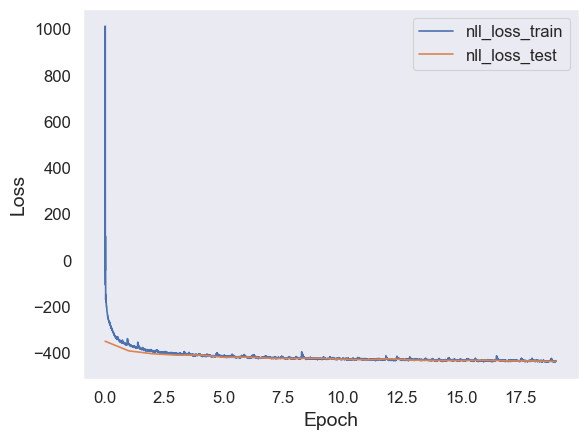

CPU times: user 43min 16s, sys: 2h 26min 6s, total: 3h 9min 23s
Wall time: 5h 41min 44s


In [47]:
%%time
# train
train_losses, test_losses = train_model(
    model, train_loader, test_loader, epochs=EPOCHS, lr=LR, loss_key='nll_loss', 
    use_cuda=USE_CUDA, use_tqdm=True, device=device
)
plot_training_curves(train_losses, test_losses)

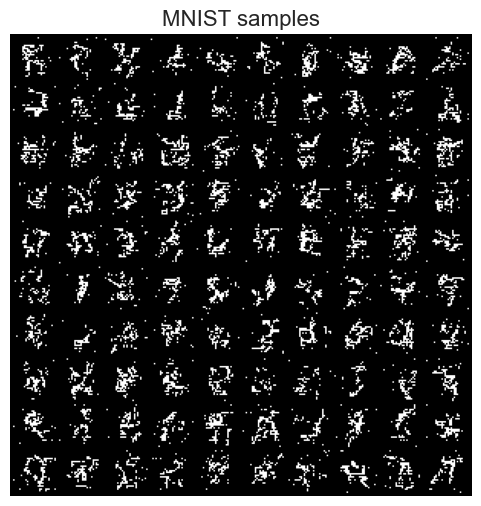

In [48]:
samples = model.sample(100)
show_samples(samples, 'MNIST samples')